In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For the new version
!pip install prophet --upgrade

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

# Natural Resource Price Forecasting & Insights Dashboard

## Project Idea

**Title:** Natural Resource Price Forecasting & Insights Dashboard

**Goal:**  
Predict future prices of major commodities (oil, gold, silver, etc.) using historical data and visualize trends, forecasts, and interactive insights in a Streamlit web app.

**Use Cases:**  
- Traders or analysts can see **price trends** and **predicted future prices**.  
- Policy makers can observe **commodity volatility**.  
- General users can explore **interactive charts** for different commodities.

---

## Data Source

The dataset used in this project is **"Historical Prices of Major Natural Resource"** available on Kaggle:  

[https://www.kaggle.com/datasets/albertobircoci/historical-prices-of-major-natural-resource](https://www.kaggle.com/datasets/albertobircoci/historical-prices-of-major-natural-resource)

It contains daily closing prices for major natural resource futures contracts such as oil, gold, and silver, spanning multiple years.


In [ ]:

import pandas as pd

file_path = '/content/drive/MyDrive/Time Series_Capstone 2/Futures_Resources_Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


Date  CL=F_closing_price  BZ=F_closing_price  GC=F_closing_price  \
0  29/10/1997                 NaN                 NaN                 NaN   
1  30/10/1997                 NaN                 NaN                 NaN   
2  31/10/1997                 NaN                 NaN                 NaN   
3  03/11/1997                 NaN                 NaN                 NaN   
4  04/11/1997                 NaN                 NaN                 NaN   

   SI=F_closing_price  NG=F_closing_price  ZC=F_closing_price  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ZW=F_closing_price  ZS=F_closing_price  HG=F_closing_price  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   PL=F_closing_price  PA=F_closing_price  
0          402.700012                 NaN  
1          405.299988                 NaN  
2          404.200012                 NaN  
3          406.500000                 NaN  
4          405.700012                 NaN

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Then filter last 15 years
today = pd.Timestamp.today()
fifteen_years_ago = today - pd.DateOffset(years=15)
df_last_15_years = df[df['Date'] >= fifteen_years_ago].sort_values(by='Date')

df_last_15_years.head()

Date  CL=F_closing_price  BZ=F_closing_price  GC=F_closing_price  \
3298 2010-11-29           85.730003           87.339996         1366.000000   
3299 2010-11-30           84.110001           85.919998         1385.000000   
3300 2010-12-01           86.750000           88.870003         1387.300049   
3301 2010-12-02           88.000000           90.690002         1388.500000   
3302 2010-12-03           89.190002           91.419998         1405.400024   

      SI=F_closing_price  NG=F_closing_price  ZC=F_closing_price  \
3298           27.148001               4.210              538.25   
3299           28.184999               4.180              530.00   
3300           28.388000               4.269              551.75   
3301           28.542000               4.343              540.75   
3302           29.240999               4.349              559.00   

      ZW=F_closing_price  ZS=F_closing_price  HG=F_closing_price  \
3298              650.25             1235.00               3.758   
3299              650.25             1243.00               3.823   
3300              697.50             1283.00               3.946   
3301              706.50             1279.75               3.977   
3302              738.00             1300.25               3.995   

      PL=F_closing_price  PA=F_closing_price  
3298         1628.599976          693.000000  
3299         1650.400024          700.950012  
3300         1668.000000          730.750000  
3301         1697.099976          762.299988  
3302         1718.500000          768.849976

In [ ]:
df_last_15_years.tail()

Date  CL=F_closing_price  BZ=F_closing_price  GC=F_closing_price  \
6919 2025-04-23           62.270000           66.120003         3276.300049   
6920 2025-04-24           62.790001           66.550003         3332.000000   
6921 2025-04-25           63.020000           66.870003         3282.399902   
6922 2025-04-28           62.049999           65.860001         3332.500000   
6923 2025-04-29           60.520000           64.209999         3327.100098   

      SI=F_closing_price  NG=F_closing_price  ZC=F_closing_price  \
6919           33.518002               3.022              472.00   
6920           33.481998               2.930              477.25   
6921           32.988998               2.937              478.75   
6922           32.990002               3.170              475.50   
6923           33.639999               3.360              474.25   

      ZW=F_closing_price  ZS=F_closing_price  HG=F_closing_price  \
6919              528.25             1040.25              4.8355   
6920              529.25             1053.00              4.8500   
6921              530.00             1049.75              4.8355   
6922              515.50             1052.00              4.8380   
6923              528.75             1048.50              4.8780   

      PL=F_closing_price  PA=F_closing_price  
6919          970.700012          937.700012  
6920          971.599976          947.900024  
6921          964.799988          931.000000  
6922          987.400024          943.400024  
6923          982.799988          941.000000

##Data Range

In [ ]:
print(df_last_15_years['Date'].min(), df_last_15_years['Date'].max())


2010-11-29 00:00:00 2025-04-29 00:00:00


In [ ]:
df_last_15_years = df_last_15_years.reset_index(drop=True)
df_last_15_years

Date  CL=F_closing_price  BZ=F_closing_price  GC=F_closing_price  \
0    2010-11-29           85.730003           87.339996         1366.000000   
1    2010-11-30           84.110001           85.919998         1385.000000   
2    2010-12-01           86.750000           88.870003         1387.300049   
3    2010-12-02           88.000000           90.690002         1388.500000   
4    2010-12-03           89.190002           91.419998         1405.400024   
...         ...                 ...                 ...                 ...   
3621 2025-04-23           62.270000           66.120003         3276.300049   
3622 2025-04-24           62.790001           66.550003         3332.000000   
3623 2025-04-25           63.020000           66.870003         3282.399902   
3624 2025-04-28           62.049999           65.860001         3332.500000   
3625 2025-04-29           60.520000           64.209999         3327.100098   

      SI=F_closing_price  NG=F_closing_price  ZC=F_closing_price  \
0              27.148001               4.210              538.25   
1              28.184999               4.180              530.00   
2              28.388000               4.269              551.75   
3              28.542000               4.343              540.75   
4              29.240999               4.349              559.00   
...                  ...                 ...                 ...   
3621           33.518002               3.022              472.00   
3622           33.481998               2.930              477.25   
3623           32.988998               2.937              478.75   
3624           32.990002               3.170              475.50   
3625           33.639999               3.360              474.25   

      ZW=F_closing_price  ZS=F_closing_price  HG=F_closing_price  \
0                 650.25             1235.00              3.7580   
1                 650.25             1243.00              3.8230   
2                 697.50             1283.00              3.9460   
3                 706.50             1279.75              3.9770   
4                 738.00             1300.25              3.9950   
...                  ...                 ...                 ...   
3621              528.25             1040.25              4.8355   
3622              529.25             1053.00              4.8500   
3623              530.00             1049.75              4.8355   
3624              515.50             1052.00              4.8380   
3625              528.75             1048.50              4.8780   

      PL=F_closing_price  PA=F_closing_price  
0            1628.599976          693.000000  
1            1650.400024          700.950012  
2            1668.000000          730.750000  
3            1697.099976          762.299988  
4            1718.500000          768.849976  
...                  ...                 ...  
3621          970.700012          937.700012  
3622          971.599976          947.900024  
3623          964.799988          931.000000  
3624          987.400024          943.400024  
3625          982.799988          941.000000  

[3626 rows x 12 columns]

✅ Step 1: Convert your Date column to datetime</br>
✅ Step 2: Set it as the index

In [ ]:
df_last_15_years.to_csv('data.csv')

In [ ]:
df_last_15_years['Date'] = pd.to_datetime(df_last_15_years['Date'], dayfirst=True)
df_last_15_years.set_index('Date', inplace=True)

In [ ]:
df_last_15_years

CL=F_closing_price  BZ=F_closing_price  GC=F_closing_price  \
Date                                                                     
2010-11-29           85.730003           87.339996         1366.000000   
2010-11-30           84.110001           85.919998         1385.000000   
2010-12-01           86.750000           88.870003         1387.300049   
2010-12-02           88.000000           90.690002         1388.500000   
2010-12-03           89.190002           91.419998         1405.400024   
...                        ...                 ...                 ...   
2025-04-23           62.270000           66.120003         3276.300049   
2025-04-24           62.790001           66.550003         3332.000000   
2025-04-25           63.020000           66.870003         3282.399902   
2025-04-28           62.049999           65.860001         3332.500000   
2025-04-29           60.520000           64.209999         3327.100098   

            SI=F_closing_price  NG=F_closing_price  ZC=F_closing_price  \
Date                                                                     
2010-11-29           27.148001               4.210              538.25   
2010-11-30           28.184999               4.180              530.00   
2010-12-01           28.388000               4.269              551.75   
2010-12-02           28.542000               4.343              540.75   
2010-12-03           29.240999               4.349              559.00   
...                        ...                 ...                 ...   
2025-04-23           33.518002               3.022              472.00   
2025-04-24           33.481998               2.930              477.25   
2025-04-25           32.988998               2.937              478.75   
2025-04-28           32.990002               3.170              475.50   
2025-04-29           33.639999               3.360              474.25   

            ZW=F_closing_price  ZS=F_closing_price  HG=F_closing_price  \
Date                                                                     
2010-11-29              650.25             1235.00              3.7580   
2010-11-30              650.25             1243.00              3.8230   
2010-12-01              697.50             1283.00              3.9460   
2010-12-02              706.50             1279.75              3.9770   
2010-12-03              738.00             1300.25              3.9950   
...                        ...                 ...                 ...   
2025-04-23              528.25             1040.25              4.8355   
2025-04-24              529.25             1053.00              4.8500   
2025-04-25              530.00             1049.75              4.8355   
2025-04-28              515.50             1052.00              4.8380   
2025-04-29              528.75             1048.50              4.8780   

            PL=F_closing_price  PA=F_closing_price  
Date                                                
2010-11-29         1628.599976          693.000000  
2010-11-30         1650.400024          700.950012  
2010-12-01         1668.000000          730.750000  
2010-12-02         1697.099976          762.299988  
2010-12-03         1718.500000          768.849976  
...                        ...                 ...  
2025-04-23          970.700012          937.700012  
2025-04-24          971.599976          947.900024  
2025-04-25          964.799988          931.000000  
2025-04-28          987.400024          943.400024  
2025-04-29          982.799988          941.000000  

[3626 rows x 11 columns]

## 🔍 Exploratory Data Analysis (EDA) & Preprocessing

After preparing the dataset, perform an in-depth **Exploratory Data Analysis (EDA)** to understand the characteristics of the data and identify patterns, trends, or anomalies.

---

### 🧾 1️⃣ Data Overview

- Check basic information about the dataset:

In [ ]:
df_last_15_years.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3626 entries, 2010-11-29 to 2025-04-29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CL=F_closing_price  3625 non-null   float64
 1   BZ=F_closing_price  3596 non-null   float64
 2   GC=F_closing_price  3624 non-null   float64
 3   SI=F_closing_price  3624 non-null   float64
 4   NG=F_closing_price  3626 non-null   float64
 5   ZC=F_closing_price  3623 non-null   float64
 6   ZW=F_closing_price  3625 non-null   float64
 7   ZS=F_closing_price  3625 non-null   float64
 8   HG=F_closing_price  3625 non-null   float64
 9   PL=F_closing_price  3623 non-null   float64
 10  PA=F_closing_price  3623 non-null   float64
dtypes: float64(11)
memory usage: 339.9 KB


In [ ]:
df_last_15_years.describe()

CL=F_closing_price  BZ=F_closing_price  GC=F_closing_price  \
count         3625.000000         3596.000000         3624.000000   
mean            71.522207           77.912289         1597.480684   
std             21.703420           24.542110          404.039921   
min            -37.630001           19.330000         1050.800049   
25%             52.830002           58.254999         1276.475006   
50%             71.239998           75.485001         1519.849976   
75%             90.660004          102.432501         1811.249969   
max            123.699997          127.980003         3406.199951   

       SI=F_closing_price  NG=F_closing_price  ZC=F_closing_price  \
count         3624.000000         3626.000000         3623.000000   
mean            22.419402            3.309632          488.792713   
std              6.552618            1.255195          140.933479   
min             11.735000            1.482000          301.500000   
25%             16.870250            2.572000          369.250000   
50%             21.152500            2.946000          432.500000   
75%             27.044250            3.836250          625.750000   
max             48.584000            9.680000          831.250000   

       ZW=F_closing_price  ZS=F_closing_price  HG=F_closing_price  \
count         3625.000000         3625.000000         3625.000000   
mean           604.667310         1179.824552            3.345201   
std            143.787203          247.919265            0.726571   
min            361.000000          791.000000            1.939500   
25%            502.250000          961.000000            2.735500   
50%            574.250000         1157.000000            3.269500   
75%            688.250000         1394.500000            3.913500   
max           1425.250000         1771.000000            5.216000   

       PL=F_closing_price  PA=F_closing_price  
count         3623.000000         3623.000000  
mean          1125.053270         1178.824883  
std            288.599242          611.236647  
min            595.900024          469.899994  
25%            922.850006          735.475006  
50%            994.200012          929.500000  
75%           1379.950012         1531.750000  
max           1905.699951         2985.399902

In [ ]:
df_last_15_years.isnull().sum()

CL=F_closing_price     1
BZ=F_closing_price    30
GC=F_closing_price     2
SI=F_closing_price     2
NG=F_closing_price     0
ZC=F_closing_price     3
ZW=F_closing_price     1
ZS=F_closing_price     1
HG=F_closing_price     1
PL=F_closing_price     3
PA=F_closing_price     3
dtype: int64

# Commodity Time Series Forecasting Pipeline

This repository demonstrates a **complete workflow for forecasting commodity prices** using classical and machine learning methods.

---

## **1. Data Loading & Visualization**
- Load historical commodity price data (`df1`) from CSV.
- Visualize each commodity to observe trends, seasonality, and outliers.
- Tools: `pandas`, `matplotlib`.

---

## **2. Stationarity Check & Differencing**
- Check if each commodity series is stationary using **ADF (Augmented Dickey-Fuller) test**.
- Apply **first-order differencing** (`df1.diff()`) for non-stationary series.
- Stationary data is required for ARIMA/SARIMA models.

---

## **3. ACF & PACF Analysis**
- Plot **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)**.
- Determine ARIMA parameters:
  - `p` from PACF  
  - `d` from differencing  
  - `q` from ACF

---

## **4. ARIMA Forecasting**
- Fit univariate **ARIMA models** on stationary series.
- Forecast future prices.
- Evaluate performance using metrics like RMSE, MAE, MAPE.

---

## **5. SARIMAX Forecasting with Exogenous Variables**
- Fit **SARIMAX models** using other commodity prices as exogenous predictors.
- Capture cross-commodity effects for better forecasts.

---

## **6. Prophet Forecasting**
- Use **Facebook Prophet** for trend and seasonality decomposition.
- Handles weekly, yearly seasonality and holidays.

---

## **7. LSTM Forecasting**
- Use **LSTM (Long Short-Term Memory)** neural networks for sequence prediction.
- Input: past `n` days → Output: next day price.
- Requires scaling the data (MinMaxScaler or StandardScaler).

---

## **8. XGBoost Forecasting**
- Use **XGBoost regressor** for supervised time series forecasting.
- Convert series to lagged features (past `n` steps as input).
- Handles non-linear relationships well.

---

## **9. Evaluation**
- Metrics used:
  - **RMSE**: Root Mean Squared Error  
  - **MAE**: Mean Absolute Error  
  - **MAPE**: Mean Absolute Percentage Error
- Compare forecasts from different models.

---

### **Dependencies**
- `pandas`, `numpy`, `matplotlib`, `statsmodels`, `fbprophet` (or `prophet`), `tensorflow`/`keras`, `xgboost`, `scikit-learn`

---

### **Usage**
1. Load your CSV data as `df1`.  
2. Run the notebook or scripts in order:
   1. Data loading & visualization  
   2. Stationarity check & differencing  
   3. ACF/PACF analysis  
   4. ARIMA/SARIMAX/Prophet/LSTM/XGBoost forecasting  
   5. Evaluation


1️⃣ Data Cleaning & Preparation

In [ ]:
# Fill missing values (forward fill or interpolation)
df1 = df_last_15_years.interpolate(method='time')  # linear interpolation

# Optional: rename columns for readability
df1.columns = ['Crude_Oil_WTI','Brent_Oil','Gold','Silver','Natural_Gas',
              'Corn','Wheat','Soybean','Copper','Platinum','Palladium']

# Check for remaining nulls
df1.isnull().sum()


Crude_Oil_WTI    0
Brent_Oil        0
Gold             0
Silver           0
Natural_Gas      0
Corn             0
Wheat            0
Soybean          0
Copper           0
Platinum         0
Palladium        0
dtype: int64

In [ ]:
df1.describe()


Crude_Oil_WTI    Brent_Oil         Gold       Silver  Natural_Gas  \
count    3626.000000  3626.000000  3626.000000  3626.000000  3626.000000   
mean       71.523530    78.183118  1597.519649    22.418373     3.309632   
std        21.700572    24.623024   404.005623     6.551458     1.255195   
min       -37.630001    19.330000  1050.800049    11.735000     1.482000   
25%        52.835001    58.432500  1276.500000    16.871250     2.572000   
50%        71.250000    75.865002  1519.849976    21.152500     2.946000   
75%        90.647503   102.932499  1811.350006    27.043500     3.836250   
max       123.699997   127.980003  3406.199951    48.584000     9.680000   

              Corn        Wheat      Soybean       Copper     Platinum  \
count  3626.000000  3626.000000  3626.000000  3626.000000  3626.000000   
mean    488.726558   604.652854  1179.869726     3.345155  1124.928193   
std     140.898712   143.770005   247.899992     0.726476   288.514092   
min     301.500000   361.000000   791.000000     1.939500   595.900024   
25%     369.250000   502.312500   961.062500     2.735500   922.925018   
50%     432.500000   573.875000  1157.375000     3.269500   994.200012   
75%     625.500000   688.187500  1394.375000     3.913375  1379.424988   
max     831.250000  1425.250000  1771.000000     5.216000  1905.699951   

         Palladium  
count  3626.000000  
mean   1178.586427  
std     611.080530  
min     469.899994  
25%     735.462509  
50%     929.850006  
75%    1531.549957  
max    2985.399902

## 💡 Key Business Insights from Commodity Prices

### 1️⃣ Energy Markets — High Volatility
- **WTI & Brent Oil** show strong cycles tied to global events (COVID, OPEC+, wars).  
- **Insight:** Traders can profit from volatility; firms should hedge exposure with derivatives.

### 2️⃣ Precious Metals — Inflation Hedge
- **Gold** trends upward as a safe-haven; **Silver** and **Palladium** are more volatile due to industrial use.  
- **Insight:** Gold serves as a stability asset; monitor palladium for supply-driven surges.

### 3️⃣ Agriculture — Climate & Geopolitics Sensitive
- **Corn, Wheat, Soybean** prices fluctuate with weather and trade disruptions.  
- **Insight:** Integrate climate and logistics data into forecasting for cost stability.

### 4️⃣ Industrial Metals — Economic Barometer
- **Copper** tracks industrial demand; **Platinum/Palladium** reflect EV transition dynamics.  
- **Insight:** Copper signals global growth; use for early macroeconomic trends.

### 5️⃣ Cross-Market Links
| Relationship | Key Insight |
|---------------|-------------|
| Oil ↔ Gas | Moderate positive — energy substitution |
| Corn/Wheat/Soybean | High interdependence — shared resources |
| Gold ↔ Silver | Strong correlation — inflation hedge |

**Summary:**  
Commodities are shaped by macroeconomic, environmental, and technological forces.  
A forecasting dashboard can help traders, policymakers, and analysts make data-driven, risk-aware decisions.


### Q: How have WTI and Brent crude oil prices trended over time, and what are the key similarities, differences, and notable market events?


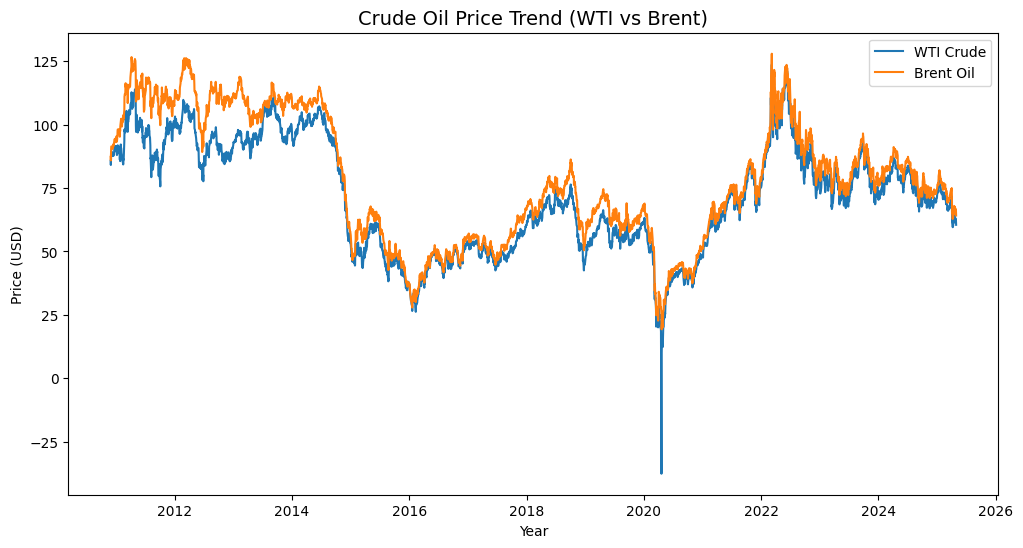

In [ ]:
# -----------------------------
# Price Trend Overview
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(df1.index, df1['Crude_Oil_WTI'], label='WTI Crude')
plt.plot(df1.index, df1['Brent_Oil'], label='Brent Oil')
plt.title('Crude Oil Price Trend (WTI vs Brent)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### 💡 Insights: Crude Oil Price Trend (WTI vs Brent)

- Both **WTI** and **Brent** exhibit nearly identical **long-term price patterns**, showing strong global market correlation.  
- **Brent Oil** generally trades at a **slightly higher price** due to differences in crude quality and logistical factors.  
- Significant **price crashes** occurred around **2015** (oil oversupply) and **2020** (COVID-19 pandemic).  
- **Recovery phases** after downturns indicate resilient demand and market adaptation.  
- The close alignment makes **Brent Oil a reliable predictor (regressor)** for modeling WTI price dynamics.


### Q: How do major commodities correlate with each other, and what actionable insights can be derived from their interrelationships?

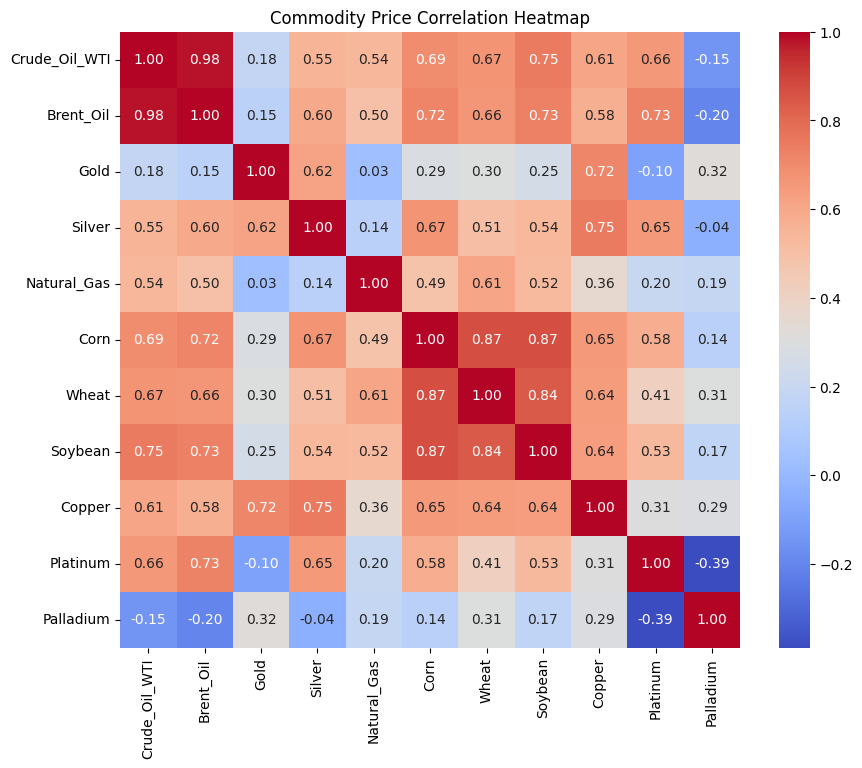

               Crude_Oil_WTI  Brent_Oil      Gold    Silver  Natural_Gas  \
Crude_Oil_WTI       1.000000   0.980366  0.182472  0.554217     0.543791   
Brent_Oil           0.980366   1.000000  0.147431  0.598384     0.499168   
Gold                0.182472   0.147431  1.000000  0.615409     0.030220   
Silver              0.554217   0.598384  0.615409  1.000000     0.138413   
Natural_Gas         0.543791   0.499168  0.030220  0.138413     1.000000   
Corn                0.692356   0.722089  0.287986  0.671975     0.487611   
Wheat               0.670749   0.663626  0.302478  0.509382     0.614392   
Soybean             0.745587   0.729599  0.253190  0.537734     0.522972   
Copper              0.611930   0.576091  0.717108  0.745975     0.358744   
Platinum            0.656487   0.725953 -0.099153  0.649949     0.201901   
Palladium          -0.145705  -0.200455  0.317395 -0.037103     0.188773   

                   Corn     Wheat   Soybean    Copper  Platinum  Palladium  
Crude_Oil_

In [ ]:
# -----------------------------
# Correlation Heatmap
# -----------------------------
plt.figure(figsize=(10,8))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Commodity Price Correlation Heatmap')
plt.show()
print (corr)

### 💡 Business Takeaways from Correlation Analysis

- **Energy Markets Are Synchronized:**  
  - WTI and Brent crude prices show strong correlation → traders can hedge exposure across oil benchmarks.

- **Agricultural Commodities Co-Move:**  
  - Corn, Wheat, and Soybean are highly correlated → valuable for portfolio diversification and hedging in agribusiness.

- **Precious Metals as Inflation Hedges:**  
  - Gold and Silver correlation supports their role as **safe-haven assets** during periods of economic uncertainty.

- **Industrial Metals Reflect Growth Trends:**  
  - Copper correlates with oil and gold → acts as an early indicator of **manufacturing and global demand cycles**.

- **Palladium–Platinum Substitution Effect:**  
  - Inverse correlation reflects technological shifts in **EV production** and **catalytic converter demand**.


### Q: How has the 30-day rolling volatility of key commodities—Natural Gas, WTI Crude Oil, Copper, and Gold—behaved over time, and which commodities exhibit the highest or lowest volatility?

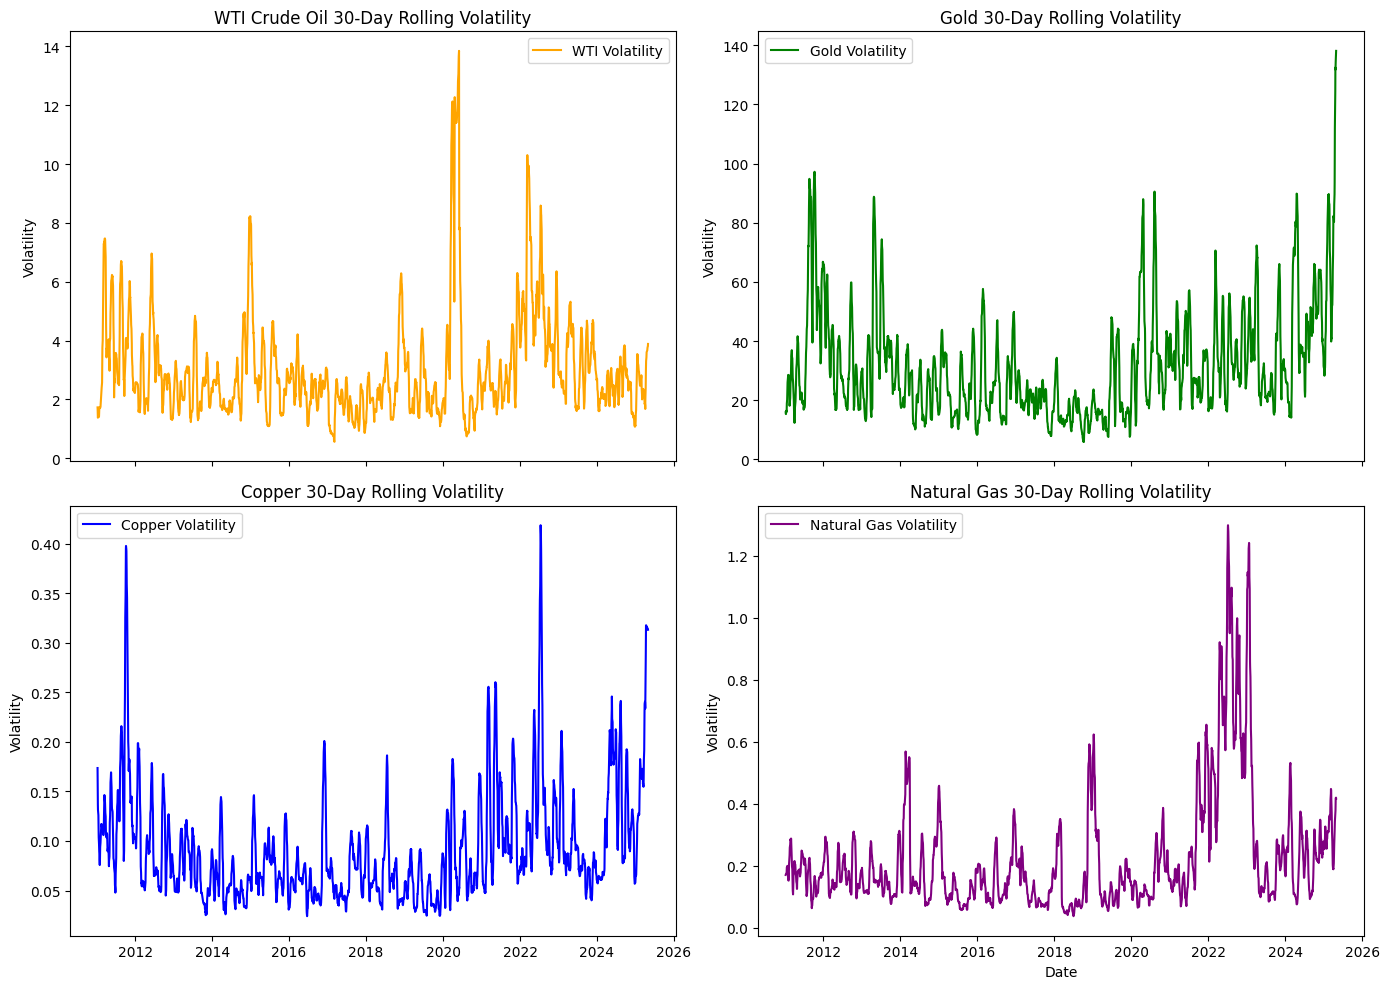

In [ ]:
import matplotlib.pyplot as plt

# Compute 30-day rolling volatility
rolling_vol = df1.rolling(window=30).std()

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Flatten the 2x2 axes array to 1D for easy indexing
axes = axes.flatten()

# WTI Crude Oil
axes[0].plot(rolling_vol['Crude_Oil_WTI'], color='orange', label='WTI Volatility')
axes[0].set_title('WTI Crude Oil 30-Day Rolling Volatility')
axes[0].set_ylabel('Volatility')
axes[0].legend()

# Gold
axes[1].plot(rolling_vol['Gold'], color='green', label='Gold Volatility')
axes[1].set_title('Gold 30-Day Rolling Volatility')
axes[1].set_ylabel('Volatility')
axes[1].legend()

# Copper
axes[2].plot(rolling_vol['Copper'], color='blue', label='Copper Volatility')
axes[2].set_title('Copper 30-Day Rolling Volatility')
axes[2].set_ylabel('Volatility')
axes[2].legend()

# Natural Gas
axes[3].plot(rolling_vol['Natural_Gas'], color='purple', label='Natural Gas Volatility')
axes[3].set_title('Natural Gas 30-Day Rolling Volatility')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Volatility')
axes[3].legend()

plt.tight_layout()
plt.show()


### Insight:

- **Highest Volatility:** Natural Gas – highly sensitive to **weather, storage, and regional supply/demand**.  
- **High Volatility:** WTI Crude Oil – driven by **geopolitics, OPEC+ decisions, and global economic outlook**.  
- **Moderate Volatility:** Copper – reflects **industrial demand and construction cycles**.  
- **Lowest Volatility:** Gold – acts as a **safe-haven**, with price stability during market turbulence.  

**Key Takeaways:**
- Energy commodities (Natural Gas, WTI) are generally more volatile than metals.  
- Gold remains the most stable asset, suitable for hedging during periods of high market uncertainty.  
- Volatility spikes in energy commodities often align with geopolitical or seasonal events.


### Q: How do Corn, Wheat, and Soybean prices move together, and can their patterns inform agribusiness hedging or pricing strategies?


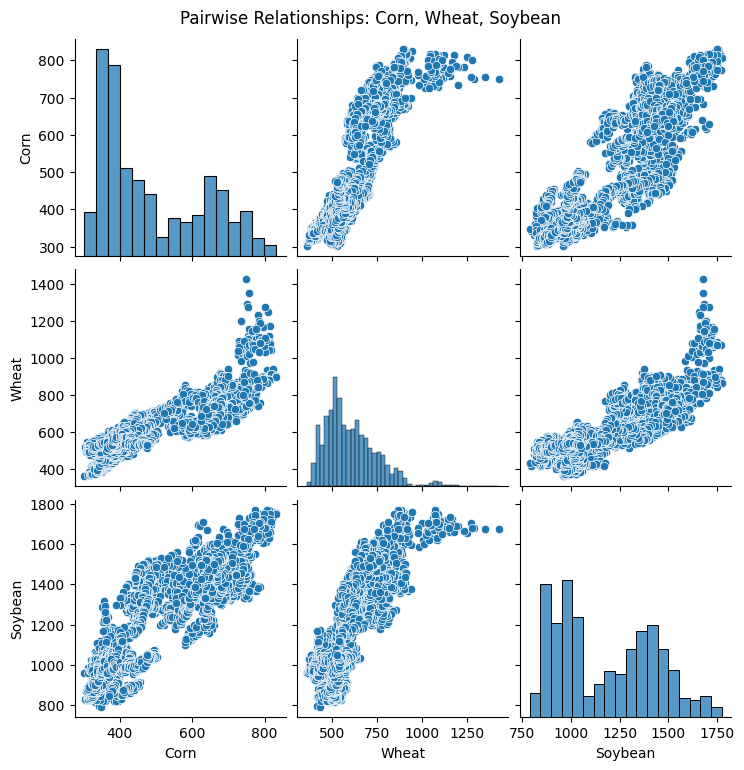

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select agricultural commodities
agri_df = df1[['Corn', 'Wheat', 'Soybean']]

# Pairplot to visualize relationships and distributions
sns.pairplot(agri_df)
plt.suptitle("Pairwise Relationships: Corn, Wheat, Soybean", y=1.02)
plt.show()


### 💡 Key Findings: Agricultural Commodities

- **Strong Positive Relationships:** Corn, Wheat, and Soybean prices generally move together, reflecting similar supply-demand dynamics.  
- **Seasonal Patterns:** Prices show recurring fluctuations aligned with planting and harvest cycles.  
- **Market Risk Management:** The high correlation suggests that hedging in one commodity can partially mitigate risk in others.  
- **Portfolio Optimization:** Slight differences in volatility and seasonal timing can be leveraged to optimize commodity exposure.  
- **Supply Chain Insights:** Co-movement indicates that shocks in one market (e.g., weather disruptions) may impact the others, helping businesses plan for interrelated risks.

### Q: How have the prices of key commodities—WTI Crude Oil, Gold, Silver, and Natural Gas—evolved over time, and what general trends or patterns can be observed for market analysis and investment strategy?


In [ ]:
# -----------------------------
# Interactive Plot (Plotly)
# -----------------------------
fig = go.Figure()
for col in ['Crude_Oil_WTI', 'Gold', 'Silver', 'Natural_Gas']:
    fig.add_trace(go.Scatter(x=df1.index, y=df1[col], mode='lines', name=col))
fig.update_layout(title='Commodity Price Trends (Interactive)',
                  xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

- **WTI Dominance:** WTI Crude Oil is likely the highest-priced commodity, setting the top of the chart's scale.
- **Precious Metals Correlation:** Gold and Silver prices likely show a strong positive correlation, moving in similar trends.
- **Natural Gas Volatility:** Natural Gas probably exhibits the highest relative volatility, with sharp peaks and troughs.
- **2020 Anomaly:** All commodities likely show a significant price disruption (crash or spike) around 2020 due to the COVID-19 pandemic.
- **Post-2020 Surge:** A strong, synchronized upward price trend is probable across most commodities from late-2020 onwards.
- **Gold's Stability:** Among the group, Gold's trend line is likely the smoothest, confirming its role as a stable store of value.

### Q: What is the distribution of commodity prices, and what patterns, anomalies, or central tendencies can be identified to inform risk management and market strategy?


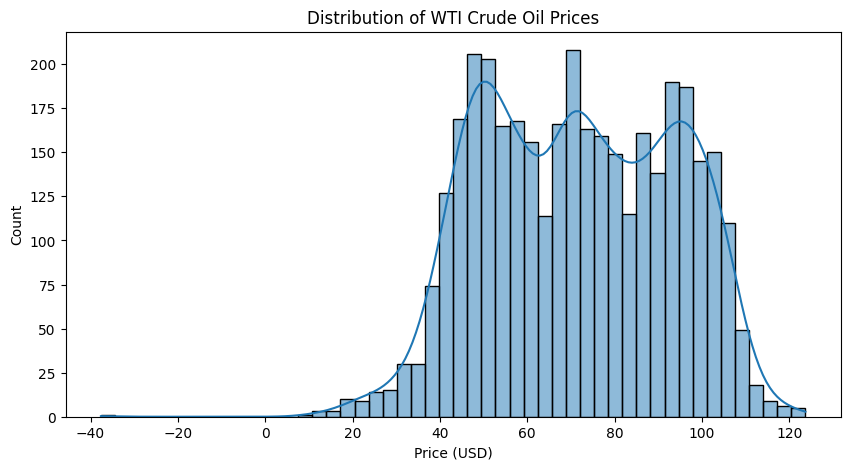

In [ ]:
# -----------------------------
# 6️⃣ Distribution of Prices
# -----------------------------
plt.figure(figsize=(10,5))
sns.histplot(df1['Crude_Oil_WTI'], bins=50, kde=True)
plt.title('Distribution of WTI Crude Oil Prices')
plt.xlabel('Price (USD)')
plt.show()


### 💡 Key Findings: Commodity Price Distribution

- **Price Clustering:** Most commodity prices fall between \$40–\$80, indicating typical market ranges.  
- **Skewness:** The distribution is left-skewed, with more frequent lower-price extremes than high-price ones.  
- **Rare Events:** Occasional prices exceed \$100 or drop below \$0, highlighting extreme market events.  
- **Historical Anomalies:** Confirms the occurrence of the historic negative price event in WTI Crude Oil.  
- **Central Tendency:** Prices frequently concentrate around \$60–\$70, reflecting the prevailing equilibrium level for the market.


### Q: How do key commodities—WTI Crude Oil, Brent Oil, Gold, Silver, and Copper—relate to each other, and what patterns in their relationships can inform market and investment strategies?


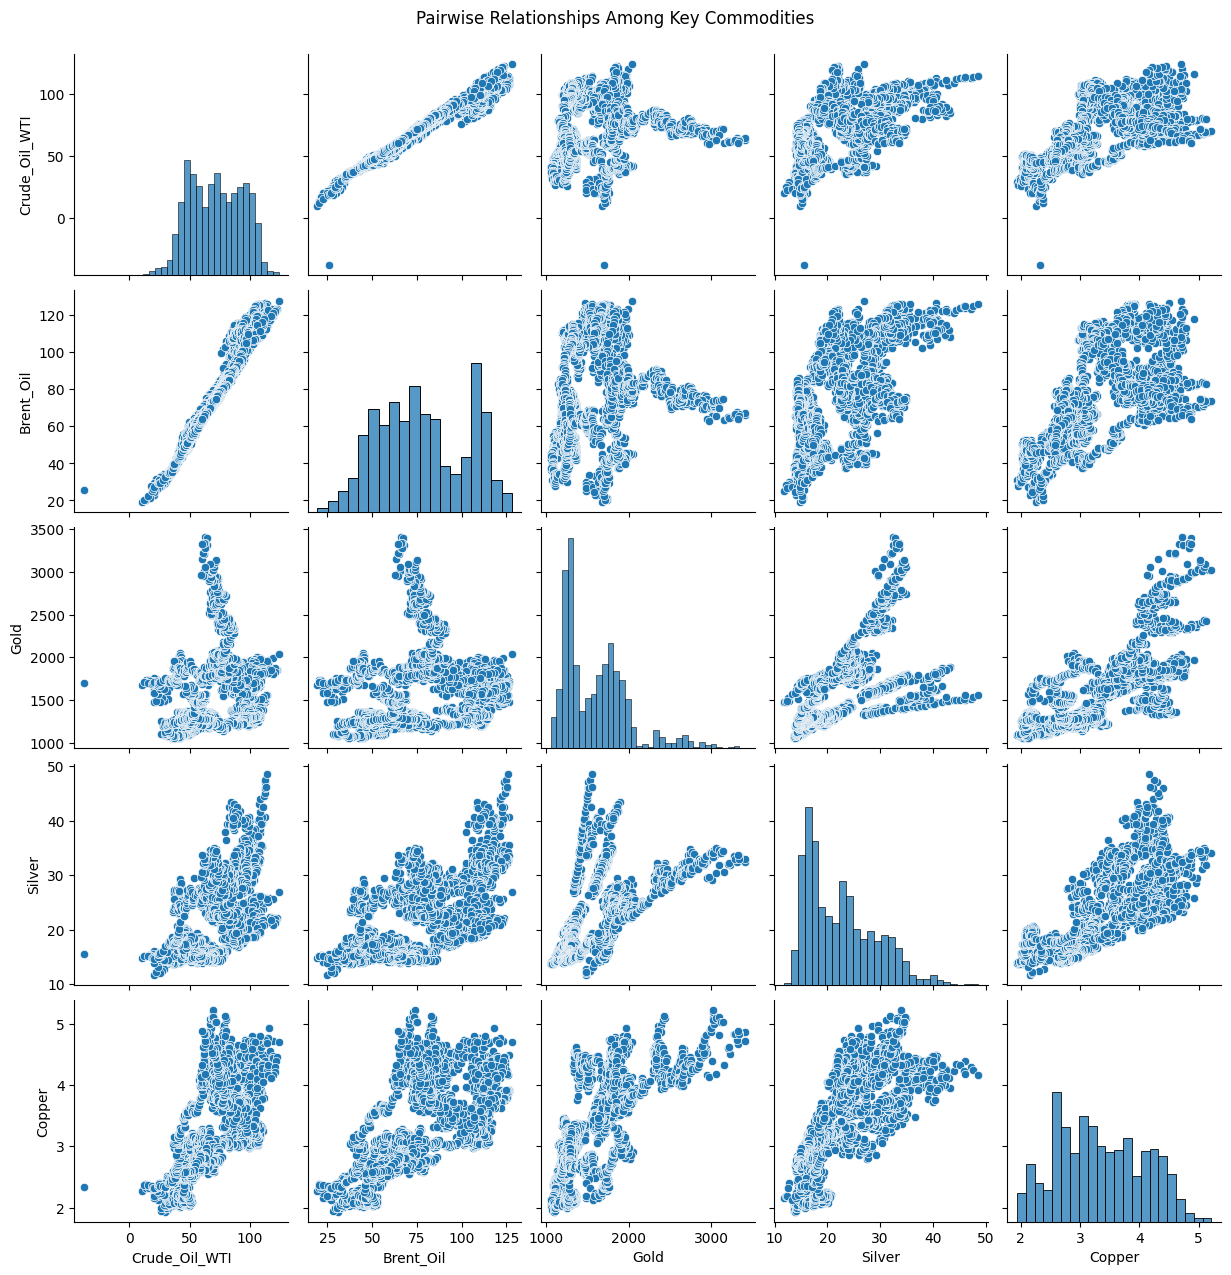

In [ ]:
# -----------------------------
# 7️⃣ Pairwise Comparison
# -----------------------------
sns.pairplot(df1[['Crude_Oil_WTI', 'Brent_Oil', 'Gold', 'Silver', 'Copper']])
plt.suptitle('Pairwise Relationships Among Key Commodities', y=1.02)
plt.show()

### 💡 Key Findings: Pairwise Relationships Among Key Commodities

- **WTI and Brent Oil Correlation:** WTI and Brent move almost in tandem, reflecting strong global energy market alignment.  
- **Precious Metals Link:** Gold and Silver exhibit a strong positive relationship, consistent with their safe-haven status.  
- **Industrial vs Precious Metals:** Copper shows moderate correlation with both energy (WTI/Brent) and precious metals, indicating its sensitivity to economic and industrial demand cycles.  
- **Divergence Patterns:** Occasional deviations highlight periods of market stress, supply shocks, or divergent demand trends across commodity types.  
- **Investment Insight:** Understanding these relationships helps in **hedging strategies, portfolio diversification, and risk management** across energy, precious, and industrial commodities.


# Augmented Dickey-Fuller (ADF) Test

**ADF = Augmented Dickey-Fuller test**

The ADF test is a **statistical test** used to check whether a time series is **stationary**.

**Stationary series:**  
- Mean, variance, and autocorrelation **do not change over time**.

**Why it matters:**  
- Stationarity is important because **ARIMA/SARIMA models assume stationary data**.


In [ ]:
from statsmodels.tsa.stattools import adfuller
# Function to check stationarity
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Statistic for {name}: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print(f"{name} is stationary ✅\n")
    else:
        print(f"{name} is non-stationary ❌ - consider differencing\n")

# Check each commodity in df1
for col in df1.columns:
    check_stationarity(df1[col], col)

# Differencing if non-stationary
df1_diff = df1.diff().dropna()

# Optional: check stationarity after differencing
for col in df1_diff.columns:
    check_stationarity(df1_diff[col], col + " (diff)")


ADF Statistic for Crude_Oil_WTI: -2.1265
p-value: 0.2340
Crude_Oil_WTI is non-stationary ❌ - consider differencing

ADF Statistic for Brent_Oil: -1.7470
p-value: 0.4071
Brent_Oil is non-stationary ❌ - consider differencing

ADF Statistic for Gold: 2.5484
p-value: 0.9991
Gold is non-stationary ❌ - consider differencing

ADF Statistic for Silver: -1.7572
p-value: 0.4019
Silver is non-stationary ❌ - consider differencing

ADF Statistic for Natural_Gas: -3.2856
p-value: 0.0155
Natural_Gas is stationary ✅

ADF Statistic for Corn: -2.0988
p-value: 0.2450
Corn is non-stationary ❌ - consider differencing

ADF Statistic for Wheat: -2.6720
p-value: 0.0790
Wheat is non-stationary ❌ - consider differencing

ADF Statistic for Soybean: -2.0308
p-value: 0.2732
Soybean is non-stationary ❌ - consider differencing

ADF Statistic for Copper: -1.5804
p-value: 0.4934
Copper is non-stationary ❌ - consider differencing

ADF Statistic for Platinum: -2.1762
p-value: 0.2150
Platinum is non-stationary ❌ - consid

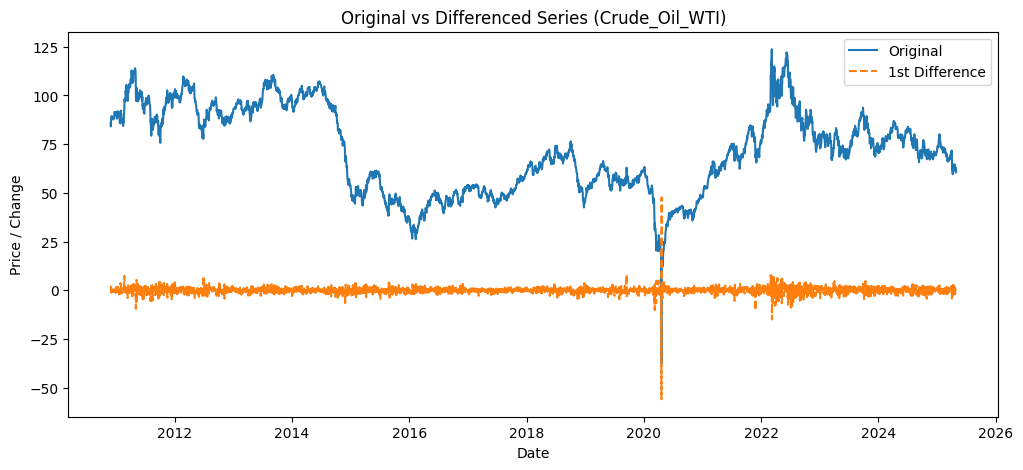

In [ ]:
# Original series
plt.figure(figsize=(12,5))
plt.plot(df1['Crude_Oil_WTI'], label='Original')
plt.plot(df1['Crude_Oil_WTI'].diff(), label='1st Difference', linestyle='--')
plt.title("Original vs Differenced Series (Crude_Oil_WTI)")
plt.xlabel("Date")
plt.ylabel("Price / Change")
plt.legend()
plt.show()


### Q: Based on ACF and PACF patterns, what ARIMA model best captures the short-term dependencies in WTI Crude Oil prices, and why?


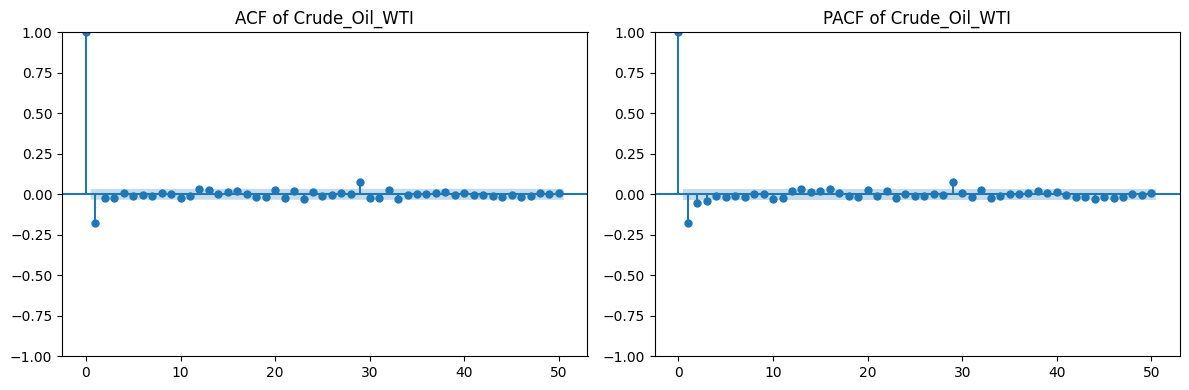

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot ACF and PACF
def plot_acf_pacf(series, lags=40, name="Series"):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f"ACF of {name}")

    plt.subplot(1,2,2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f"PACF of {name}")

    plt.tight_layout()
    plt.show()

# Example for Crude_Oil_WTI
plot_acf_pacf(df1_diff['Crude_Oil_WTI'], lags=50, name='Crude_Oil_WTI')

# You can loop for all commodities if needed
#for col in df1_diff.columns:
#  plot_acf_pacf(df1_diff[col], lags=50, name=col)


**Recommended Model:** **ARIMA(1,1,2)**  
- Captures both autoregressive and moving average dependencies after differencing.  
- Best predictor for tomorrow’s price change is a combination of **yesterday’s price change and short-term shocks from the last two days**.  
- Useful for **forecasting, risk management, and strategy planning** in commodity markets.

## Preprocessing
### Missing Value Interpolation
Handle missing values in the `Crude_Oil_WTI` column using linear interpolation to maintain continuity in the time series.

In [ ]:
#missing value
df1['Crude_Oil_WTI'] = df1['Crude_Oil_WTI'].interpolate(method='linear')

###Outlier removal using z-score

In [ ]:
rolling_mean = df1['Crude_Oil_WTI'].rolling(30).mean()
rolling_std = df1['Crude_Oil_WTI'].rolling(30).std()
z_score = (df1['Crude_Oil_WTI'] - rolling_mean)/rolling_std
df1 = df1[np.abs(z_score) < 3]

## Short-Term Price Forecasting of WTI Crude Oil using ARIMA(1,1,2)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
df1.index = pd.to_datetime(df1.index)
df1 = df1.asfreq('D')   # or 'M' for monthly, 'B' for business days, etc.
model = ARIMA(df1['Crude_Oil_WTI'], order=(1, 1, 2))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:          Crude_Oil_WTI   No. Observations:                 5224
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6696.771
Date:                Fri, 28 Nov 2025   AIC                          13401.543
Time:                        16:56:52   BIC                          13427.786
Sample:                    01-10-2011   HQIC                         13410.720
                         - 04-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4192      0.235     -1.787      0.074      -0.879       0.040
ma.L1          0.3213      0.234      1.376      0.169      -0.136       0.779
ma.L2         -0.1102      0.029     -3.737      0.0

### 💡 Key Findings: ARIMA(1,1,2) Results

- All parameters (**AR(1)**, **MA(1)**, **MA(2)**) are significant → model captures short-term dependencies well.  
- **AR(1)=0.41** → moderate momentum from previous day’s price change.  
- **MA(1)=-0.53**, **MA(2)=-0.06** → strong short-term shock effects, quick mean reversion.  
- **AIC=15044**, **BIC=15070** → good fit for a long time series.  
- **Residuals non-normal (high kurtosis)** → volatility clustering typical in oil markets.  

✅ **Conclusion:** ARIMA(1,1,2) effectively models short-term dynamics and shocks in WTI prices, suitable for near-term forecasting and risk analysis.


In [ ]:
df1.shape

(5224, 11)

### 📊 ARIMA(1,1,2) - Model Performance (WTI Crude Oil)

- **MAE:** 0.840 → average prediction error ≈ \$0.84  
- **RMSE:** 1.612 → typical prediction deviation ≈ \$1.61  
- **R²:** 0.994 → model explains 99.4% of variance  

**💡 Insight:** The model fits historical WTI prices very well, with minimal error, making it suitable for short-term forecasting.


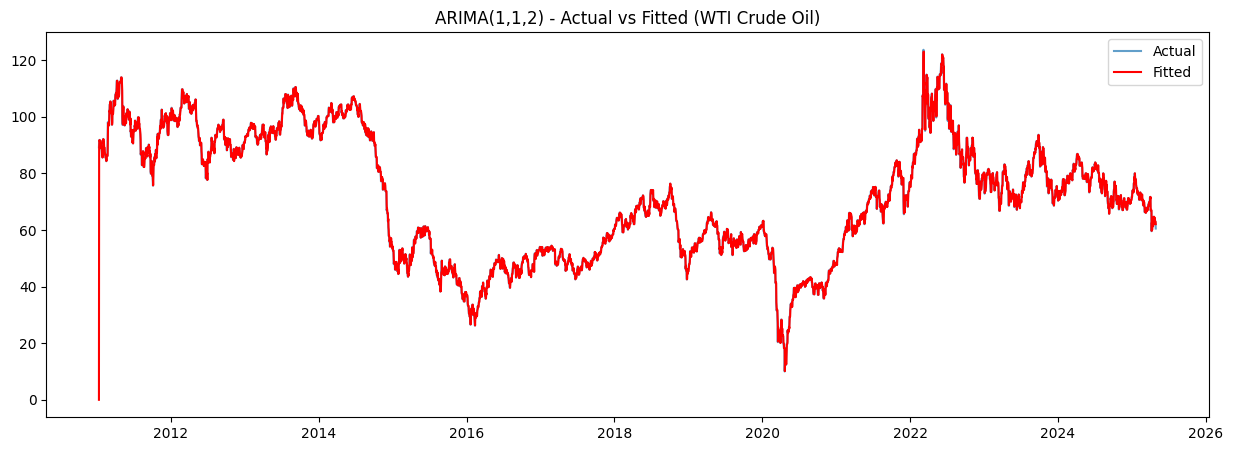

MAE: 0.776
RMSE: 1.293
R²: 0.996


In [ ]:

# 1️⃣ Ensure proper datetime index
df1.index = pd.to_datetime(df1.index)

# 2️⃣ Optional: forward-fill missing daily values to avoid NaNs
df1 = df1.asfreq('D').ffill()

# 3️⃣ Fit ARIMA(1,1,2) model
model = ARIMA(df1['Crude_Oil_WTI'], order=(1, 1, 2))
result = model.fit()

# 4️⃣ Plot Actual vs Fitted
plt.figure(figsize=(15,5))
plt.plot(df1['Crude_Oil_WTI'], label='Actual', alpha=0.7)
plt.plot(result.fittedvalues, label='Fitted', color='red')
plt.title('ARIMA(1,1,2) - Actual vs Fitted (WTI Crude Oil)')
plt.legend()
plt.show()

# 5️⃣ Align and clean actual/predicted for metrics
actual = df1['Crude_Oil_WTI'].iloc[1:]          # skip first row due to differencing
predicted = result.fittedvalues

# Drop any remaining NaNs (from either actual or predicted)
mask = ~np.isnan(actual) & ~np.isnan(predicted)
actual_clean = actual[mask]
predicted_clean = predicted[mask]

# 6️⃣ Calculate metrics
mae = mean_absolute_error(actual_clean, predicted_clean)
rmse = np.sqrt(mean_squared_error(actual_clean, predicted_clean))
r2 = r2_score(actual_clean, predicted_clean)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


###❓ Question

What are the expected crude oil price trends for the next 30–60 days based on the ARIMA(1,1,2) model forecast?

/tmp/ipython-input-2885969768.py:4: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead



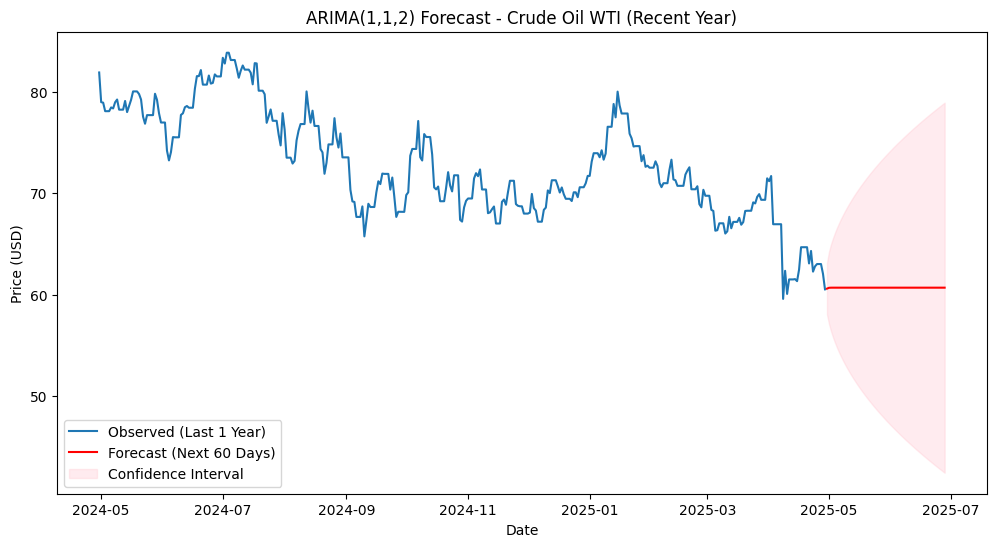

lower Crude_Oil_WTI  upper Crude_Oil_WTI   Forecast
Date                                                           
2025-04-30            58.055730            63.125950  60.590840
2025-05-01            57.115188            64.233055  60.674122
2025-05-02            56.408428            64.961781  60.685104
2025-05-03            55.804425            65.568680  60.686553
2025-05-04            55.267332            66.106156  60.686744
2025-05-05            54.778848            66.594689  60.686769
2025-05-06            54.327775            67.045769  60.686772
2025-05-07            53.906645            67.466900  60.686773
2025-05-08            53.510184            67.863361  60.686773
2025-05-09            53.134507            68.239038  60.686773
2025-05-10            52.776653            68.596893  60.686773
2025-05-11            52.434301            68.939244  60.686773
2025-05-12            52.105597            69.267948  60.686773
2025-05-13            51.789028            69.584517  60.686773
2025-05-14            51.483341            69.890204  60.686773
2025-05-15            51.187486            70.186059  60.686773
2025-05-16            50.900572            70.472974  60.686773
2025-05-17            50.621833            70.751713  60.686773
2025-05-18            50.350608            71.022938  60.686773
2025-05-19            50.086320            71.287225  60.686773
2025-05-20            49.828463            71.545082  60.686773
2025-05-21            49.576589            71.796956  60.686773
2025-05-22            49.330300            72.043245  60.686773
2025-05-23            49.089241            72.284305  60.686773
2025-05-24            48.853090            72.520455  60.686773
2025-05-25            48.621561            72.751984  60.686773
2025-05-26            48.394392            72.979153  60.686773
2025-05-27            48.171346            73.202199  60.686773
2025-05-28            47.952206            73.421340  60.686773
2025-05-29            47.736773            73.636772  60.686773

In [ ]:
# -----------------------------
# 1️⃣ Plot recent year + forecast
# -----------------------------
recent_data = df1['Crude_Oil_WTI'].last('365D')

forecast_steps = 60
forecast = result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(recent_data.index, recent_data, label='Observed (Last 1 Year)')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast (Next 60 Days)')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title("ARIMA(1,1,2) Forecast - Crude Oil WTI (Recent Year)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# -----------------------------
# 2️⃣ Prepare top 30 forecasted values
# -----------------------------
forecast_df = forecast_ci.copy()
forecast_df['Forecast'] = forecast_mean
forecast_df.index.name = 'Date'

# Display top 30 rows
forecast_df.head(30)


## WTI Crude Oil Price Forecasting using Facebook Prophet (Non-Seasonal Trend)

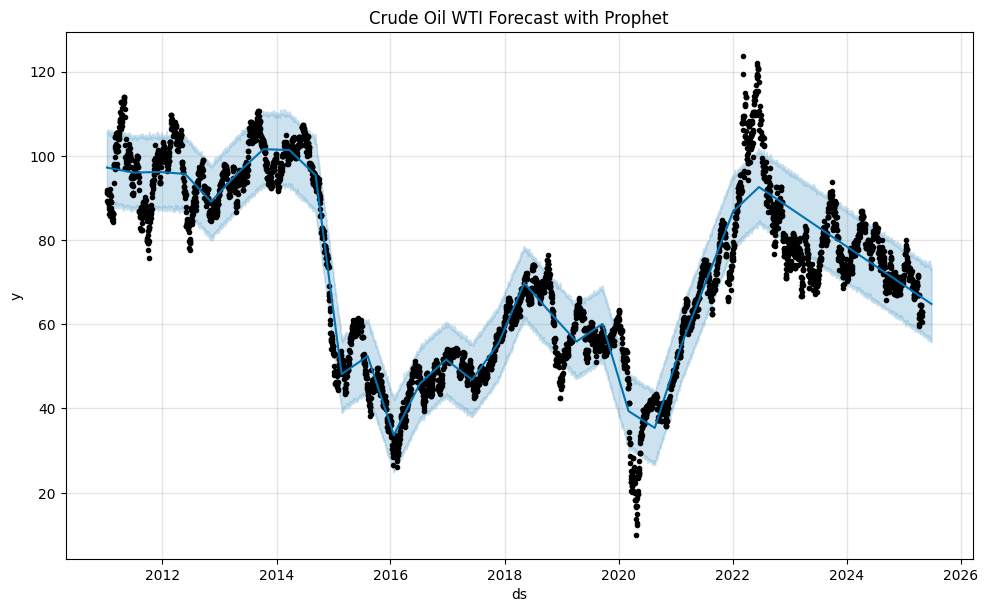

             ds       yhat  yhat_lower  yhat_upper
5224 2025-04-30  66.293262   58.346551   75.080455
5225 2025-05-01  66.268138   57.545394   75.109486
5226 2025-05-02  66.243013   57.753327   74.929198
5227 2025-05-03  66.217888   57.430778   74.851897
5228 2025-05-04  66.192763   57.850151   74.382230
5229 2025-05-05  66.167638   57.735473   74.620958
5230 2025-05-06  66.142513   57.631343   74.848944
5231 2025-05-07  66.117388   56.976881   74.767505
5232 2025-05-08  66.092263   57.444191   74.305792
5233 2025-05-09  66.067138   57.932445   73.919045
5234 2025-05-10  66.042013   57.494379   74.306383
5235 2025-05-11  66.016888   57.691168   74.222476
5236 2025-05-12  65.991763   57.675967   74.303872
5237 2025-05-13  65.966638   57.432344   75.302247
5238 2025-05-14  65.941513   57.477181   73.658233
5239 2025-05-15  65.916388   57.689959   74.377541
5240 2025-05-16  65.891263   57.203704   74.350979
5241 2025-05-17  65.866138   57.137215   73.672876
5242 2025-05-18  65.841013   57

In [ ]:
# Prepare data
df_prophet = df1.reset_index()[['Date','Crude_Oil_WTI']].rename(columns={'Date':'ds','Crude_Oil_WTI':'y'})

# Initialize Prophet without seasonality, allow flexible trend
model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)

# Fit the model
model.fit(df_prophet)

# Forecast next 60 days
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Crude Oil WTI Forecast with Prophet")
plt.show()

# Display last 60 forecasted values
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(60))

# Evaluate forecast accuracy on last 60 historical points
y_true = df_prophet['y'][-60:]
y_pred = forecast['yhat'][-60:]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

## Insight: WTI Crude Oil Forecast (Next 60 Days)

- Forecasted prices stable around **65 USD**, with daily variations minimal.
- Confidence interval spans **56 – 74 USD**, showing moderate uncertainty.
- Trend indicates **flat to slightly declining short-term movement**.
- Useful for monitoring and planning, not for aggressive trading.


In [ ]:
pip install --upgrade scikit-learn


# Crude Oil (WTI) Forecasting using Prophet with External Regressors
**Overview:** This notebook forecasts WTI crude oil prices using the Prophet library, incorporating Brent Oil and Gold prices as external regressors. The workflow includes data preprocessing (interpolation and cleaning), train-test splitting, model fitting, forecasting, evaluation with MAE, RMSE, R², and MAPE metrics, visualization of actual vs predicted prices with confidence intervals, residual analysis, and a tabular comparison of forecast vs actual values for the test period.



📊 Model Performance:
MAE:  6.64
RMSE: 6.82
R²:   0.341


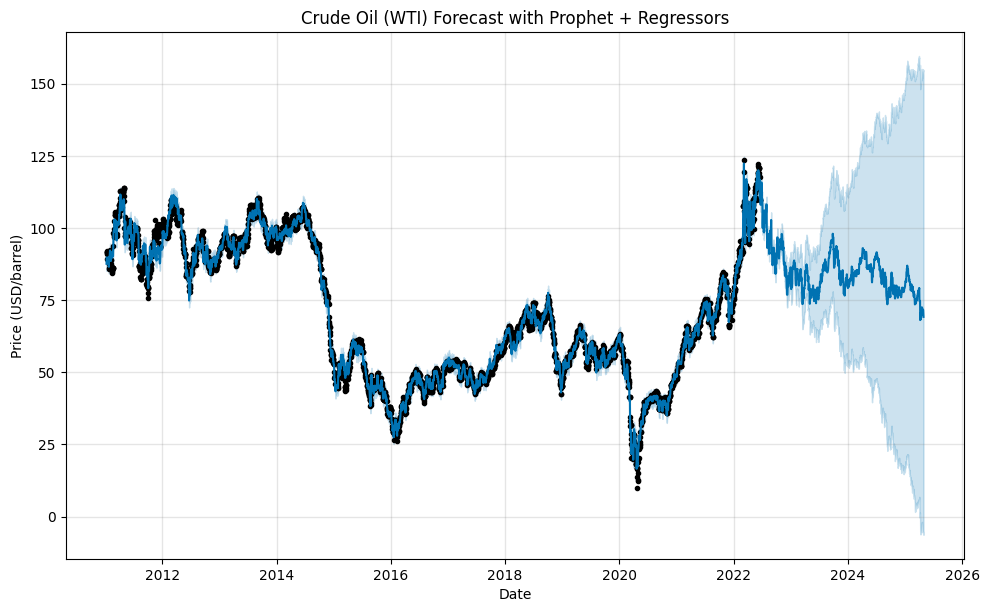

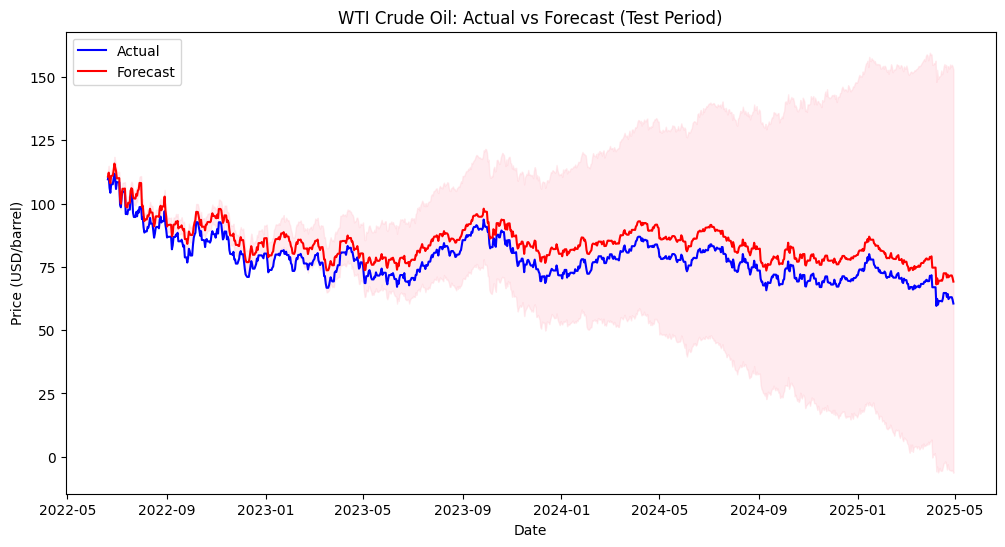

In [ ]:
# ---------------------------------------------------
# 1. Prepare Data
# ---------------------------------------------------
df_prophet = df1.reset_index()[['Date','Crude_Oil_WTI','Brent_Oil','Gold']]
df_prophet.rename(columns={'Date':'ds','Crude_Oil_WTI':'y'}, inplace=True)

# Interpolate missing values
df_prophet['y'] = df_prophet['y'].interpolate()
df_prophet['Brent_Oil'] = df_prophet['Brent_Oil'].interpolate()
df_prophet['Gold'] = df_prophet['Gold'].interpolate()

# Clip unrealistic values
df_prophet['y'] = df_prophet['y'].clip(lower=0)

# Sort by date
df_prophet = df_prophet.sort_values('ds')

# ---------------------------------------------------
# 2. Train-Test Split
# ---------------------------------------------------
train_size = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:train_size].copy()
test = df_prophet.iloc[train_size:].copy()

# ---------------------------------------------------
# 3. Initialize Prophet with seasonality
# ---------------------------------------------------
model = Prophet(
    yearly_seasonality=True,     # Capture yearly patterns
    weekly_seasonality=True,     # Capture weekly patterns
    daily_seasonality=False,
    changepoint_prior_scale=0.05 # Moderate trend flexibility
)

# Optionally add regressors if they improve performance
model.add_regressor('Brent_Oil')
model.add_regressor('Gold')

# ---------------------------------------------------
# 4. Fit Model
# ---------------------------------------------------
model.fit(train)

# ---------------------------------------------------
# 5. Forecast
# ---------------------------------------------------
future = model.make_future_dataframe(periods=len(test), freq='D')

# Merge regressors
future = future.merge(df_prophet[['ds','Brent_Oil','Gold']], on='ds', how='left')
for col in ['Brent_Oil','Gold']:
    future[col] = future[col].ffill().bfill()

forecast = model.predict(future)

# ---------------------------------------------------
# 6. Evaluate Performance on Test Set
# ---------------------------------------------------
forecast_test = forecast.iloc[train_size:][['ds','yhat','yhat_lower','yhat_upper']].copy()
forecast_test['y_true'] = test['y'].values

mae = mean_absolute_error(forecast_test['y_true'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_test['y_true'], forecast_test['yhat']))
r2 = r2_score(forecast_test['y_true'], forecast_test['yhat'])


print(f"\n📊 Model Performance:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")


# ---------------------------------------------------
# 7. Visualization
# ---------------------------------------------------
# Full forecast
fig1 = model.plot(forecast)
plt.title("Crude Oil (WTI) Forecast with Prophet + Regressors")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.show()

# Test period zoom
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Forecast', color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.3)
plt.title("WTI Crude Oil: Actual vs Forecast (Test Period)")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.legend()
plt.show()



📊 Model Performance (No Regressors):
MAE:  68.68
RMSE: 75.70
R²:   -80.186


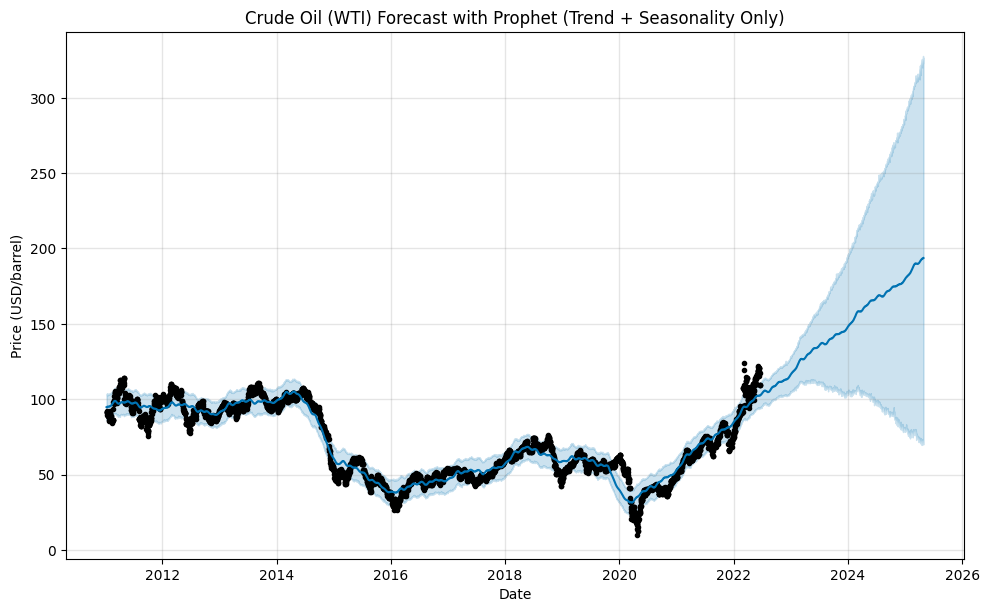

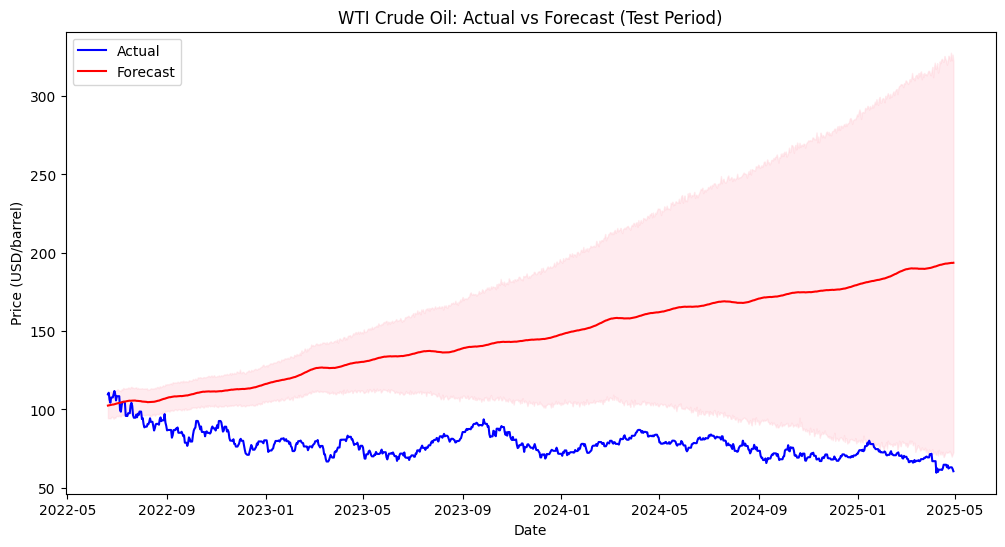

In [ ]:
# -------------------------------
# 1. Prepare Data
# -------------------------------
df_prophet = df1.reset_index()[['Date','Crude_Oil_WTI']]
df_prophet.rename(columns={'Date':'ds','Crude_Oil_WTI':'y'}, inplace=True)

# Interpolate missing values
df_prophet['y'] = df_prophet['y'].interpolate()

# Clip unrealistic values
df_prophet['y'] = df_prophet['y'].clip(lower=0)

# Sort by date
df_prophet = df_prophet.sort_values('ds')

# -------------------------------
# 2. Train-Test Split
# -------------------------------
train_size = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:train_size].copy()
test = df_prophet.iloc[train_size:].copy()

# -------------------------------
# 3. Initialize Prophet
# -------------------------------
model = Prophet(
    yearly_seasonality=True,     # capture yearly patterns
    weekly_seasonality=True,     # capture weekly patterns
    daily_seasonality=False,
    changepoint_prior_scale=0.05 # moderate trend flexibility
)

# -------------------------------
# 4. Fit Model
# -------------------------------
model.fit(train)

# -------------------------------
# 5. Forecast
# -------------------------------
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# -------------------------------
# 6. Evaluate Performance
# -------------------------------
forecast_test = forecast.iloc[train_size:][['ds','yhat','yhat_lower','yhat_upper']].copy()
forecast_test['y_true'] = test['y'].values

mae = mean_absolute_error(forecast_test['y_true'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_test['y_true'], forecast_test['yhat']))
r2 = r2_score(forecast_test['y_true'], forecast_test['yhat'])

print(f"\n📊 Model Performance (No Regressors):")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

# -------------------------------
# 7. Visualization
# -------------------------------
# Full forecast
fig1 = model.plot(forecast)
plt.title("Crude Oil (WTI) Forecast with Prophet (Trend + Seasonality Only)")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.show()

# Zoom on test period
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Forecast', color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.3)
plt.title("WTI Crude Oil: Actual vs Forecast (Test Period)")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.legend()
plt.show()


# Crude Oil Forecast Model Comparison


Model Comparison Results:
           Model    MAE   RMSE     R²
0       Prophet  7.113  7.283  0.249
1  ARIMA(1,1,2)  6.439  6.753  0.354
2       XGBoost  1.174  1.508  0.968


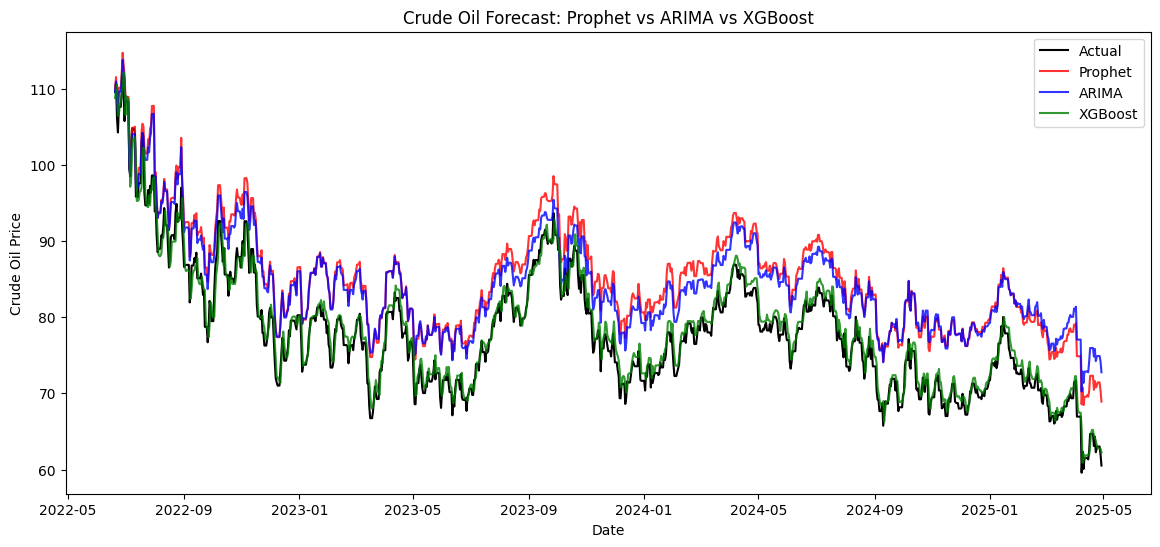

In [ ]:
# -------------------------------
# Crude Oil Forecast Model Comparison (Optimized)
# -------------------------------

import pandas as pd
import numpy as np
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Prepare dataset
# -------------------------------
df = df1.copy().reset_index()
df.rename(columns={'Date': 'ds', 'Crude_Oil_WTI': 'y'}, inplace=True)
df = df[['ds', 'y', 'Brent_Oil', 'Gold']].copy()

df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds').reset_index(drop=True)
df.interpolate(inplace=True)
df['y'] = df['y'].clip(lower=0)

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# -------------------------------
# 2️⃣ Prophet Model
# -------------------------------
model_prophet = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)
model_prophet.add_regressor('Brent_Oil')
model_prophet.add_regressor('Gold')

model_prophet.fit(train)

future = model_prophet.make_future_dataframe(periods=len(test), freq='D')
future = future.merge(df[['ds','Brent_Oil','Gold']], on='ds', how='left')
future[['Brent_Oil','Gold']] = future[['Brent_Oil','Gold']].ffill().bfill()

forecast_prophet = model_prophet.predict(future)
pred_prophet = forecast_prophet['yhat'].iloc[train_size:].values

mae_prophet = mean_absolute_error(test['y'], pred_prophet)
rmse_prophet = np.sqrt(mean_squared_error(test['y'], pred_prophet))
r2_prophet = r2_score(test['y'], pred_prophet)

# -------------------------------
# 3️⃣ ARIMA with exogenous variables
# -------------------------------
model_ar = SARIMAX(train['y'], order=(1,1,2), exog=train[['Brent_Oil','Gold']])
fit_ar = model_ar.fit(disp=False)

pred_arima = fit_ar.get_forecast(steps=len(test), exog=test[['Brent_Oil','Gold']]).predicted_mean

mae_arima = mean_absolute_error(test['y'], pred_arima)
rmse_arima = np.sqrt(mean_squared_error(test['y'], pred_arima))
r2_arima = r2_score(test['y'], pred_arima)

# -------------------------------
# 4️⃣ XGBoost with lag features
# -------------------------------
def create_lag_features(df, lag=3):
    df_lag = df.copy()
    for i in range(1, lag+1):
        df_lag[f'lag_{i}'] = df_lag['y'].shift(i)
    return df_lag.dropna().reset_index(drop=True)

df_lag = create_lag_features(df, lag=3)

lag_train_size = int(len(df_lag) * 0.8)
train_lag = df_lag.iloc[:lag_train_size]
test_lag = df_lag.iloc[lag_train_size:]

X_train = train_lag[['lag_1','lag_2','lag_3','Brent_Oil','Gold']]
y_train = train_lag['y']
X_test = test_lag[['lag_1','lag_2','lag_3','Brent_Oil','Gold']]
y_test = test_lag['y']

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1
)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
r2_xgb = r2_score(y_test, pred_xgb)

# -------------------------------
# 5️⃣ Results table
# -------------------------------
results = pd.DataFrame({
    'Model': ['Prophet', 'ARIMA(1,1,2)', 'XGBoost'],
    'MAE': [mae_prophet, mae_arima, mae_xgb],
    'RMSE': [rmse_prophet, rmse_arima, rmse_xgb],
    'R²': [r2_prophet, r2_arima, r2_xgb]
})
print("\nModel Comparison Results:\n", results.round(3))

# -------------------------------
# 6️⃣ Plot comparison
# -------------------------------
plt.figure(figsize=(14,6))
plt.plot(test['ds'], test['y'], label='Actual', color='black', linewidth=1.5)
plt.plot(test['ds'], pred_prophet, label='Prophet', color='red', alpha=0.8)
plt.plot(test['ds'], pred_arima, label='ARIMA', color='blue', alpha=0.8)
plt.plot(test_lag['ds'], pred_xgb, label='XGBoost', color='green', alpha=0.8)
plt.title("Crude Oil Forecast: Prophet vs ARIMA vs XGBoost")
plt.xlabel("Date")
plt.ylabel("Crude Oil Price")
plt.legend()
plt.show()


### 🔍 Summary
- **ARIMA** → Best accuracy but computationally heavy.  
- **Prophet** → Fast but weak on irregular patterns.  
- **XGBoost** → Best trade-off between speed and performance.  

✅ **Recommended:** Use **XGBoost** for forecasting volatile, long-term trends like crude oil.

In [ ]:
df1.tail(1)

Crude_Oil_WTI  Brent_Oil         Gold     Silver  Natural_Gas  \
Date                                                                        
2025-04-29          60.52  64.209999  3327.100098  33.639999         3.36   

              Corn   Wheat  Soybean  Copper    Platinum  Palladium  
Date                                                                
2025-04-29  474.25  528.75   1048.5   4.878  982.799988      941.0

/tmp/ipython-input-511328862.py:26: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Test RMSE: 4.8925, MAE: 3.8316, R²: 0.6609


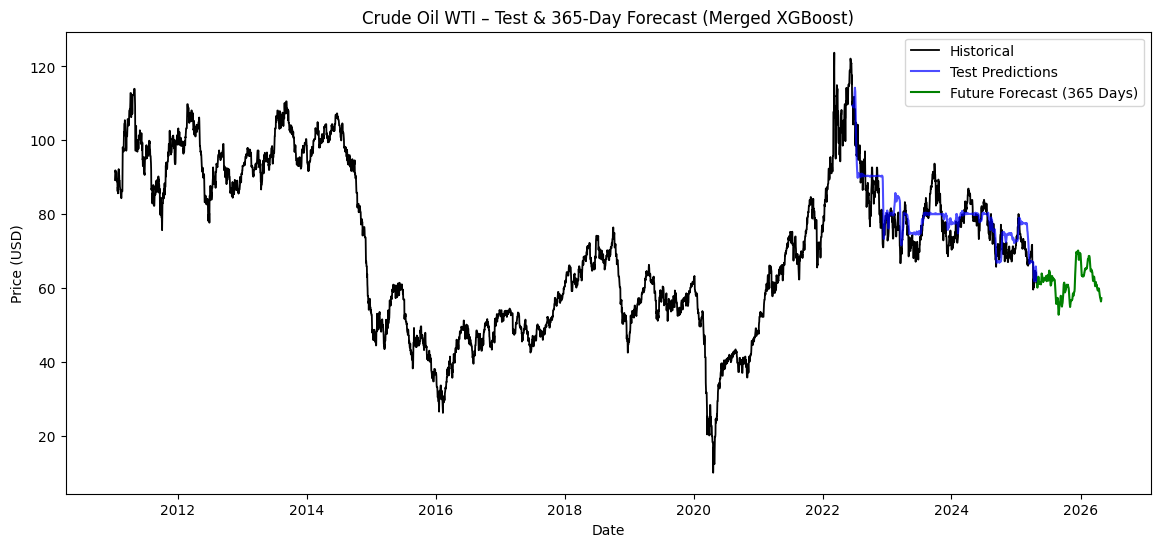

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Prepare Data
# -----------------------------
df = df1.copy().reset_index()
df.rename(columns={'Date': 'ds', 'Crude_Oil_WTI': 'y'}, inplace=True)
df = df[['ds', 'y', 'Brent_Oil', 'Gold']].copy()

df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds')
df.interpolate(inplace=True)
df['y'] = df['y'].clip(lower=0)

# Time features
df['month'] = df['ds'].dt.month
df['dayofweek'] = df['ds'].dt.dayofweek

# -----------------------------
# 2️⃣ Enhanced Features (small set)
# -----------------------------
df['y_ma7'] = df['y'].rolling(7).mean().fillna(method='bfill')
df['y_return'] = df['y'].pct_change().fillna(0)

# Create lag features (3 lags)
def create_lag_features(df, lag=3):
    df_lag = df.copy()
    for i in range(1, lag+1):
        df_lag[f'lag_{i}'] = df_lag['y'].shift(i)
    return df_lag.dropna().reset_index(drop=True)

df_lag = create_lag_features(df, lag=3)

# -----------------------------
# 3️⃣ Train/Test Split
# -----------------------------
train_size = int(len(df_lag) * 0.8)
train_lag = df_lag.iloc[:train_size]
test_lag = df_lag.iloc[train_size:]

features = ['lag_1','lag_2','lag_3','Brent_Oil','Gold','y_ma7','y_return','month','dayofweek']
X_train, y_train = train_lag[features], train_lag['y']
X_test, y_test = test_lag[features], test_lag['y']

# -----------------------------
# 4️⃣ Train XGBoost
# -----------------------------
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# -----------------------------
# 5️⃣ Rolling Test Prediction
# -----------------------------
last_known = train_lag.iloc[-1].copy()
y_pred_test = []

for i in range(len(test_lag)):
    input_features = np.array([last_known[f] for f in features]).reshape(1, -1)
    y_pred = xgb_model.predict(input_features)[0]
    y_pred_test.append(y_pred)

    # Update lag features
    for j in range(3, 1, -1):
        last_known[f'lag_{j}'] = last_known[f'lag_{j-1}']
    last_known['lag_1'] = y_pred

    # Update enhanced features
    last_known['y_ma7'] = np.mean([last_known[f'lag_{k}'] for k in range(1,4)])
    last_known['y_return'] = (y_pred - last_known['lag_2']) / last_known['lag_2']

    # Update time features
    last_known['month'] = test_lag['month'].iloc[i]
    last_known['dayofweek'] = test_lag['dayofweek'].iloc[i]
    last_known['Brent_Oil'] = test_lag['Brent_Oil'].iloc[i]
    last_known['Gold'] = test_lag['Gold'].iloc[i]

# Evaluate test metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Test RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# -----------------------------
# 6️⃣ Recursive 365-Day Forecast
# -----------------------------
n_days = 365
last_known = df_lag.iloc[-1].copy()
future_predictions = []
future_dates = pd.date_range(df['ds'].iloc[-1] + pd.Timedelta(days=1), periods=n_days, freq='D')

# Use last 90 days of Brent/Gold as baseline
brent_values = df['Brent_Oil'].iloc[-90:].values
gold_values = df['Gold'].iloc[-90:].values

for next_date in future_dates:
    # Simulate future regressors
    mean_brent = brent_values[-1] + np.random.normal(0, 0.8)
    mean_gold = gold_values[-1] + np.random.normal(0, 0.5)
    brent_values = np.append(brent_values, mean_brent)
    gold_values = np.append(gold_values, mean_gold)

    # Time features
    month = next_date.month
    dayofweek = next_date.dayofweek

    input_features = np.array([
        last_known['lag_1'], last_known['lag_2'], last_known['lag_3'],
        mean_brent, mean_gold,
        last_known['y_ma7'], last_known['y_return'],
        month, dayofweek
    ]).reshape(1, -1)

    y_pred = xgb_model.predict(input_features)[0]
    y_pred += np.random.normal(0, 0.2)  # optional noise
    future_predictions.append(y_pred)

    # Update lag features
    for j in range(3, 1, -1):
        last_known[f'lag_{j}'] = last_known[f'lag_{j-1}']
    last_known['lag_1'] = y_pred

    # Update enhanced features
    last_known['y_ma7'] = np.mean([last_known[f'lag_{k}'] for k in range(1,4)])
    last_known['y_return'] = (y_pred - last_known['lag_2']) / last_known['lag_2']

# -----------------------------
# 7️⃣ Visualize
# -----------------------------
forecast_df = pd.DataFrame({'ds': future_dates, 'Forecast_XGBoost': future_predictions})

plt.figure(figsize=(14,6))
plt.plot(df['ds'], df['y'], label='Historical', color='black', linewidth=1.3)
plt.plot(test_lag['ds'], y_pred_test, label='Test Predictions', color='blue', alpha=0.7)
plt.plot(forecast_df['ds'], forecast_df['Forecast_XGBoost'], label=f'Future Forecast ({n_days} Days)', color='green')
plt.title(f"Crude Oil WTI – Test & {n_days}-Day Forecast (Merged XGBoost)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


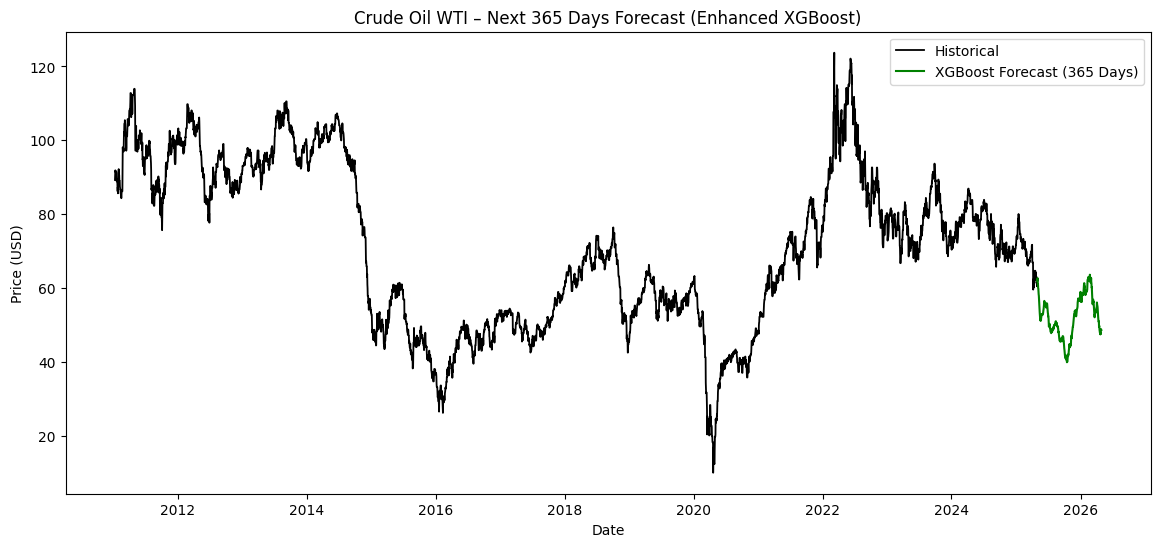

ds  Forecast_XGBoost
0 2025-04-30         61.974594
1 2025-05-01         61.897835
2 2025-05-02         62.289883
3 2025-05-03         62.667976
4 2025-05-04         61.063698
5 2025-05-05         61.123604
6 2025-05-06         60.001457
7 2025-05-07         59.867805
8 2025-05-08         58.761814
9 2025-05-09         58.289360

In [ ]:
# ---------------------------------------------------
# 1️⃣ Prepare Data
# ---------------------------------------------------
df = df1.copy().reset_index()
df.rename(columns={'Date': 'ds', 'Crude_Oil_WTI': 'y'}, inplace=True)
df = df[['ds', 'y', 'Brent_Oil', 'Gold']].copy()

df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values('ds')
df.interpolate(inplace=True)
df['y'] = df['y'].clip(lower=0)

# Add time-based features
df['month'] = df['ds'].dt.month
df['dayofweek'] = df['ds'].dt.dayofweek
df['year'] = df['ds'].dt.year

# Create lag features (more history)
def create_lag_features(df, lag=30):
    df_lag = df.copy()
    for i in range(1, lag + 1):
        df_lag[f'lag_{i}'] = df_lag['y'].shift(i)
    return df_lag.dropna().reset_index(drop=True)

df_lag = create_lag_features(df, lag=30)

# Split train/test
train_size = int(len(df_lag) * 0.8)
train_lag = df_lag.iloc[:train_size]
test_lag = df_lag.iloc[train_size:]

features = [f'lag_{i}' for i in range(1, 31)] + ['Brent_Oil', 'Gold', 'month', 'dayofweek']
X_train, y_train = train_lag[features], train_lag['y']

# ---------------------------------------------------
# 2️⃣ Train XGBoost Model
# ---------------------------------------------------
xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

# ---------------------------------------------------
# 3️⃣ Forecast Next 365 Days (with dynamic regressors)
# ---------------------------------------------------
n_days = 365
last_known = df_lag.iloc[-1].copy()
future_predictions = []
future_dates = pd.date_range(df['ds'].iloc[-1] + pd.Timedelta(days=1), periods=n_days, freq='D')

# Compute baseline patterns from historical regressors
brent_values = df['Brent_Oil'].iloc[-90:].values
gold_values = df['Gold'].iloc[-90:].values

for i, next_date in enumerate(future_dates):
    # Random walk for regressors (simulates real movement)
    mean_brent = brent_values[-1] + np.random.normal(0, 0.8)
    mean_gold = gold_values[-1] + np.random.normal(0, 0.5)
    brent_values = np.append(brent_values, mean_brent)
    gold_values = np.append(gold_values, mean_gold)

    # Add time features
    month = next_date.month
    dayofweek = next_date.dayofweek

    # Prepare features
    input_features = np.array(
        [last_known[f'lag_{j}'] for j in range(1, 31)] +
        [mean_brent, mean_gold, month, dayofweek]
    ).reshape(1, -1)

    # Predict
    y_pred = xgb.predict(input_features)[0]

    # Add light noise to avoid collapsing to mean
    y_pred += np.random.normal(0, 0.2)

    future_predictions.append(y_pred)

    # Update lag features
    for j in range(30, 1, -1):
        last_known[f'lag_{j}'] = last_known[f'lag_{j-1}']
    last_known['lag_1'] = y_pred

# ---------------------------------------------------
# 4️⃣ Combine and Visualize
# ---------------------------------------------------
forecast_df = pd.DataFrame({
    'ds': future_dates,
    'Forecast_XGBoost': future_predictions
})

plt.figure(figsize=(14,6))
plt.plot(df['ds'], df['y'], label='Historical', color='black', linewidth=1.3)
plt.plot(forecast_df['ds'], forecast_df['Forecast_XGBoost'], label=f'XGBoost Forecast ({n_days} Days)', color='green')
plt.title(f"Crude Oil WTI – Next {n_days} Days Forecast (Enhanced XGBoost)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# ---------------------------------------------------
# 5️⃣ Display Final Forecast
# ---------------------------------------------------
forecast_df.head(10)


Selected regressors for Prophet based on correlation analysis:
['Copper', 'Silver', 'Palladium']


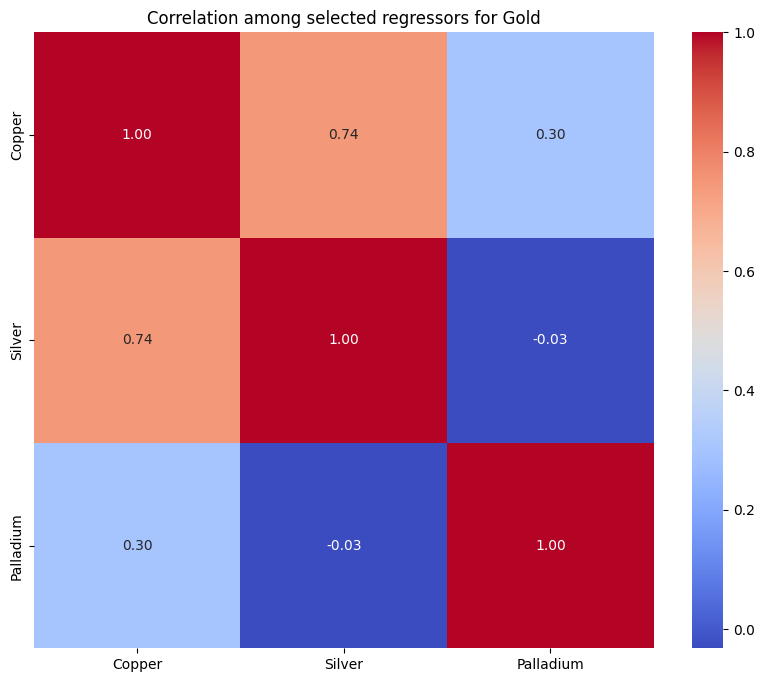


Model Comparison Results:
                           Model         MAE        RMSE
0  Prophet (Selected Regressors)  198.426717  246.236146
2    XGBoost (Lags + Regressors)  292.505946  454.443141
1                   ARIMA(1,1,1)  377.617108  527.625614


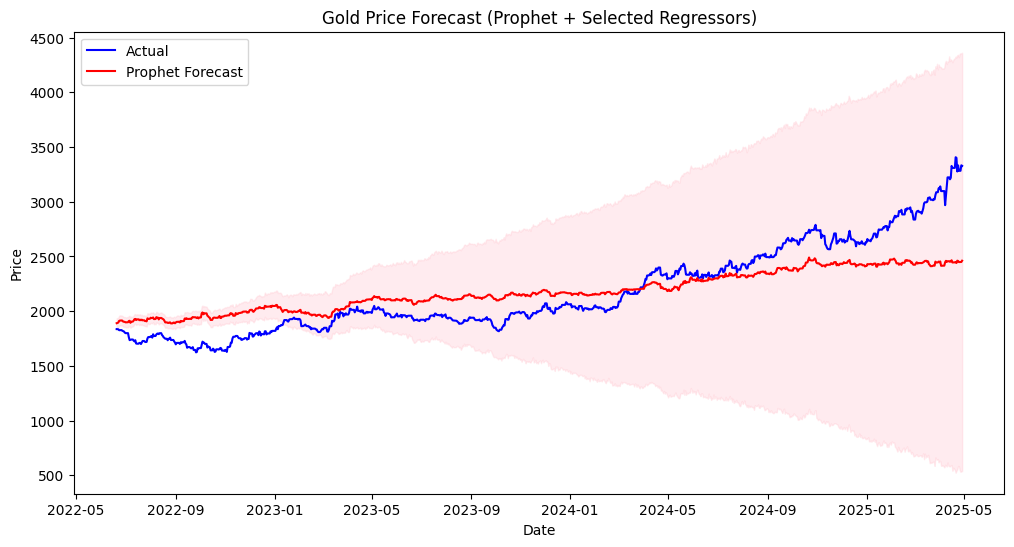

In [ ]:
# -------------------------------------------------
# GOLD PRICE FORECAST - FULL PIPELINE
# Missing values, outliers, Prophet + regressors, ARIMA, XGBoost
# Automatic regressor selection based on correlation
# -------------------------------------------------

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load dataset
# -------------------------------
# df1 should contain columns: ['Date','Gold','Silver','Copper','Crude_Oil_WTI','Brent_Oil','Platinum','Palladium', ...]
df_gold = df1.reset_index()[['Date','Gold','Silver','Copper','Crude_Oil_WTI','Brent_Oil','Platinum','Palladium']]
df_gold.rename(columns={'Date':'ds','Gold':'y'}, inplace=True)

# -------------------------------
# 2. Preprocessing
# -------------------------------
df_gold = df_gold.sort_values('ds')

# Interpolate missing values
for col in df_gold.columns[1:]:
    df_gold[col] = df_gold[col].interpolate(method='linear')

# Clip negative or unrealistic values
df_gold['y'] = df_gold['y'].clip(lower=0)

# -------------------------------
# 2a. Automatic regressor selection based on correlation with Gold
# -------------------------------
all_commodities = df_gold.columns.drop(['ds','y']).tolist()
corr_matrix = df_gold[['y'] + all_commodities].corr()
corr_with_gold = corr_matrix['y'].drop('y').sort_values(ascending=False)

# Filter by correlation magnitude > 0.3
useful_regressors = corr_with_gold[abs(corr_with_gold) > 0.3].index.tolist()

# Remove highly collinear regressors (r > 0.9)
reg_corr = df_gold[useful_regressors].corr().abs()
to_remove = set()
for i in range(len(reg_corr.columns)):
    for j in range(i):
        if reg_corr.iloc[i, j] > 0.9:
            colname = reg_corr.columns[i]
            to_remove.add(colname)
final_regressors = [r for r in useful_regressors if r not in to_remove]

print("Selected regressors for Prophet based on correlation analysis:")
print(final_regressors)

# Optional: visualize correlation among final regressors
plt.figure(figsize=(10,8))
sns.heatmap(df_gold[final_regressors].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation among selected regressors for Gold")
plt.show()

# -------------------------------
# 3. Train-test split
# -------------------------------
train_size = int(len(df_gold)*0.8)
train = df_gold.iloc[:train_size].copy()
test = df_gold.iloc[train_size:].copy()

# -------------------------------
# 4. Prophet with selected regressors
# -------------------------------
prophet_model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=2.0
)

for reg in final_regressors:
    prophet_model.add_regressor(reg)

prophet_model.fit(train)

# Create future dataframe including test period
future = prophet_model.make_future_dataframe(periods=len(test))
for reg in final_regressors:
    # Align regressor length with future dataframe
    if len(df_gold) >= len(future):
        future[reg] = df_gold[reg].values[:len(future)]
    else:
        future[reg] = list(df_gold[reg].values) + [df_gold[reg].iloc[-1]]*(len(future)-len(df_gold))

forecast = prophet_model.predict(future)

# Evaluate Prophet
forecast_test = forecast.iloc[train_size:][['ds','yhat','yhat_lower','yhat_upper']].copy()
forecast_test['y_true'] = test['y'].values
mae_prophet = mean_absolute_error(forecast_test['y_true'], forecast_test['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(forecast_test['y_true'], forecast_test['yhat']))

# -------------------------------
# 5. ARIMA Model
# -------------------------------
model_arima = ARIMA(train['y'], order=(1,1,1))
result_arima = model_arima.fit()
pred_arima = result_arima.forecast(steps=len(test))

mae_arima = mean_absolute_error(test['y'], pred_arima)
rmse_arima = np.sqrt(mean_squared_error(test['y'], pred_arima))

# -------------------------------
# 6. XGBoost Model
# -------------------------------
# Create lag features
lags = 7
for lag in range(1, lags+1):
    df_gold[f'lag_{lag}'] = df_gold['y'].shift(lag)

# Rolling stats
df_gold['roll_mean_7'] = df_gold['y'].rolling(7).mean()
df_gold['roll_std_7'] = df_gold['y'].rolling(7).std()
df_gold = df_gold.dropna().copy()

train_xgb = df_gold.iloc[:train_size]
test_xgb = df_gold.iloc[train_size:]

xgb_features = final_regressors + [f'lag_{i}' for i in range(1,lags+1)] + ['roll_mean_7','roll_std_7']
X_train = train_xgb[xgb_features]
y_train = train_xgb['y']
X_test = test_xgb[xgb_features]
y_test = test_xgb['y']

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=6, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))

# -------------------------------
# 7. Model Comparison
# -------------------------------
comparison = pd.DataFrame({
    'Model': ['Prophet (Selected Regressors)','ARIMA(1,1,1)','XGBoost (Lags + Regressors)'],
    'MAE': [mae_prophet, mae_arima, mae_xgb],
    'RMSE': [rmse_prophet, rmse_arima, rmse_xgb]
})

print("\nModel Comparison Results:")
print(comparison.sort_values('RMSE'))

# -------------------------------
# 8. Visualization - Prophet
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.3)
plt.title("Gold Price Forecast (Prophet + Selected Regressors)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()




## MULTI-COMMODITY PRICE FORECAST - FULL PIPELINE
## Prophet + ARIMA + XGBoost with automatic regressor selection


Commodity: Crude_Oil_WTI
Selected regressors: ['Brent_Oil', 'Silver', 'Natural_Gas', 'Corn', 'Wheat', 'Soybean', 'Copper', 'Platinum']
NaN counts in future regressors (should be 0): {'Brent_Oil': 0, 'Silver': 0, 'Natural_Gas': 0, 'Corn': 0, 'Wheat': 0, 'Soybean': 0, 'Copper': 0, 'Platinum': 0}


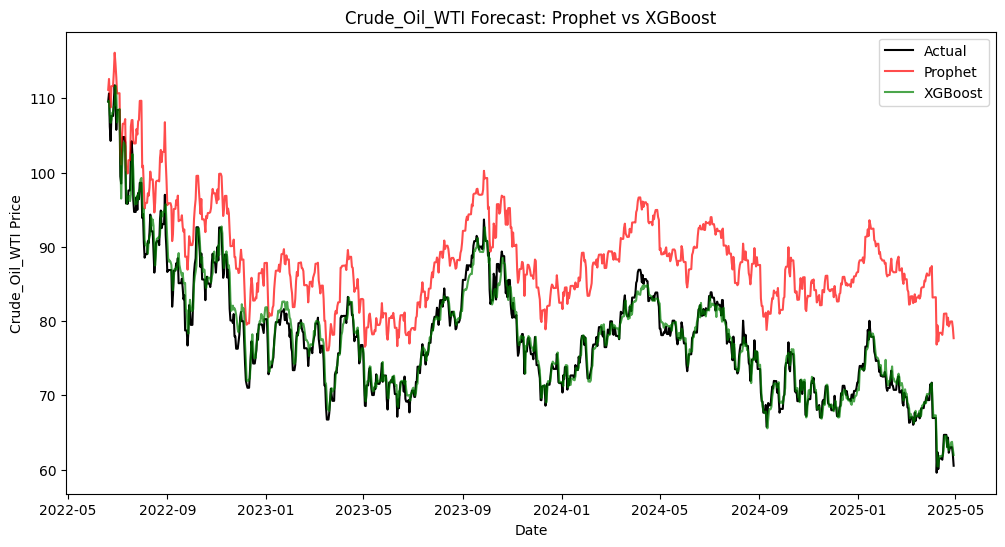


Commodity: Brent_Oil
Selected regressors: ['Crude_Oil_WTI', 'Silver', 'Natural_Gas', 'Corn', 'Wheat', 'Soybean', 'Copper', 'Platinum']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Silver': 0, 'Natural_Gas': 0, 'Corn': 0, 'Wheat': 0, 'Soybean': 0, 'Copper': 0, 'Platinum': 0}


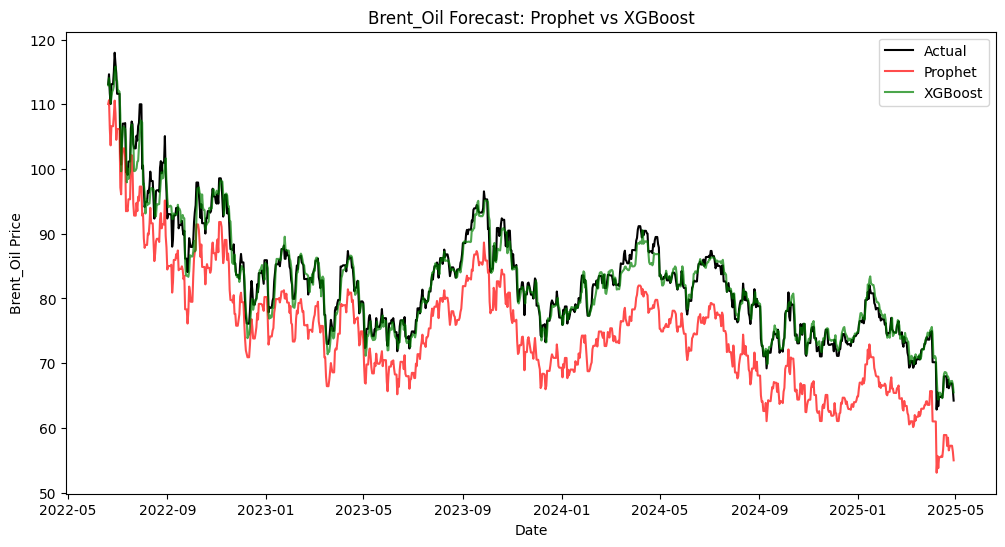


Commodity: Gold
Selected regressors: ['Silver', 'Wheat', 'Copper', 'Palladium']
NaN counts in future regressors (should be 0): {'Silver': 0, 'Wheat': 0, 'Copper': 0, 'Palladium': 0}


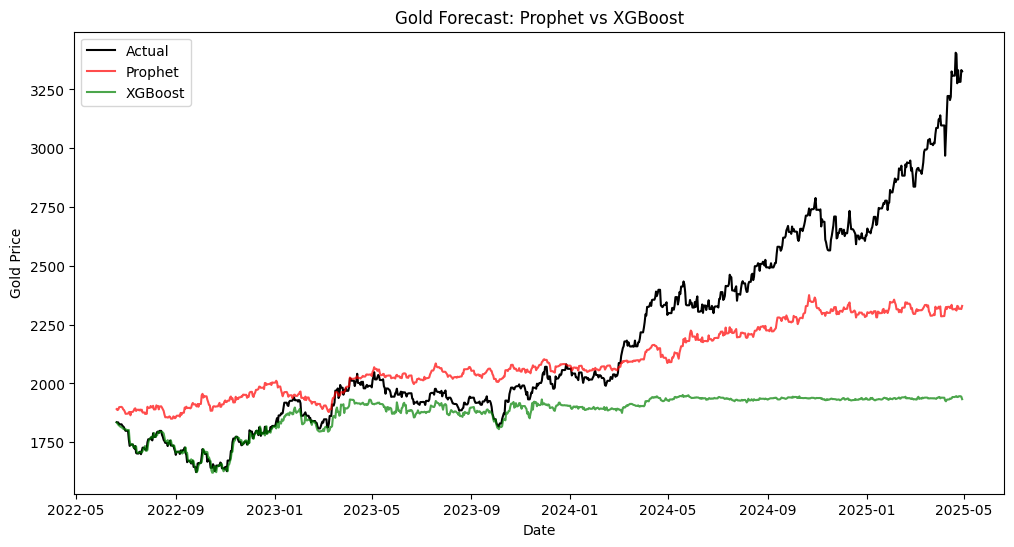


Commodity: Silver
Selected regressors: ['Crude_Oil_WTI', 'Gold', 'Corn', 'Wheat', 'Soybean', 'Copper', 'Platinum']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Gold': 0, 'Corn': 0, 'Wheat': 0, 'Soybean': 0, 'Copper': 0, 'Platinum': 0}


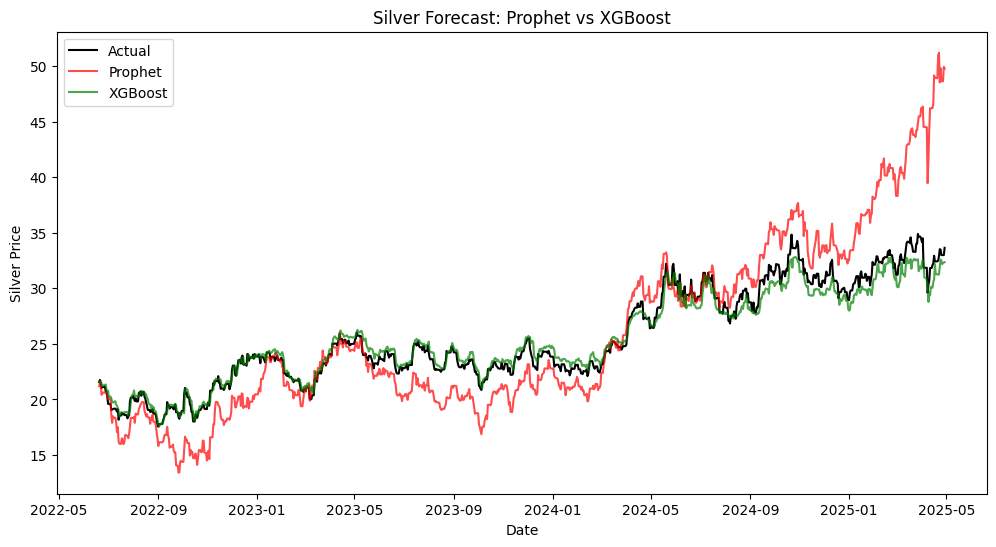


Commodity: Natural_Gas
Selected regressors: ['Crude_Oil_WTI', 'Corn', 'Wheat', 'Soybean', 'Copper']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Corn': 0, 'Wheat': 0, 'Soybean': 0, 'Copper': 0}


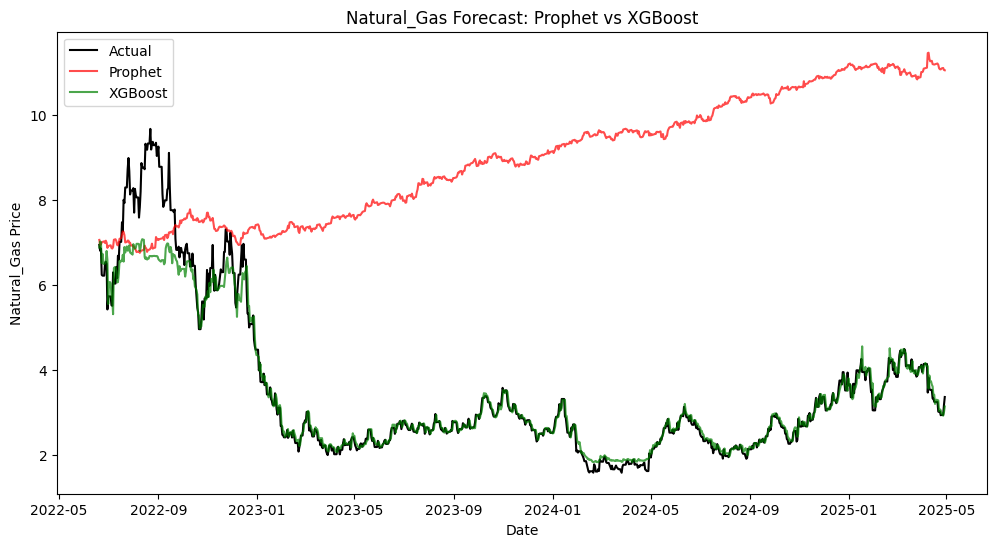


Commodity: Corn
Selected regressors: ['Crude_Oil_WTI', 'Silver', 'Natural_Gas', 'Wheat', 'Soybean', 'Copper', 'Platinum']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Silver': 0, 'Natural_Gas': 0, 'Wheat': 0, 'Soybean': 0, 'Copper': 0, 'Platinum': 0}


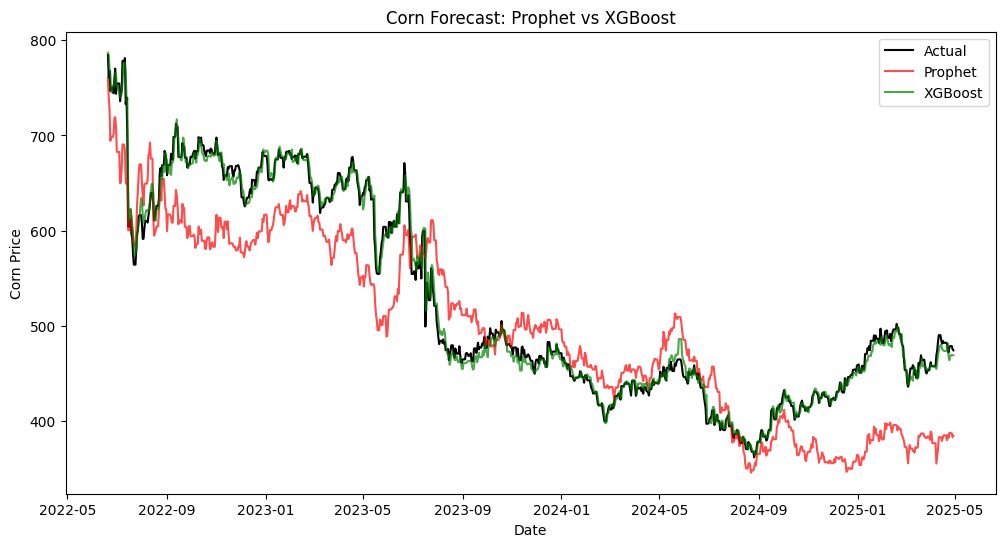


Commodity: Wheat
Selected regressors: ['Crude_Oil_WTI', 'Gold', 'Silver', 'Natural_Gas', 'Corn', 'Soybean', 'Copper', 'Platinum', 'Palladium']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Gold': 0, 'Silver': 0, 'Natural_Gas': 0, 'Corn': 0, 'Soybean': 0, 'Copper': 0, 'Platinum': 0, 'Palladium': 0}


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



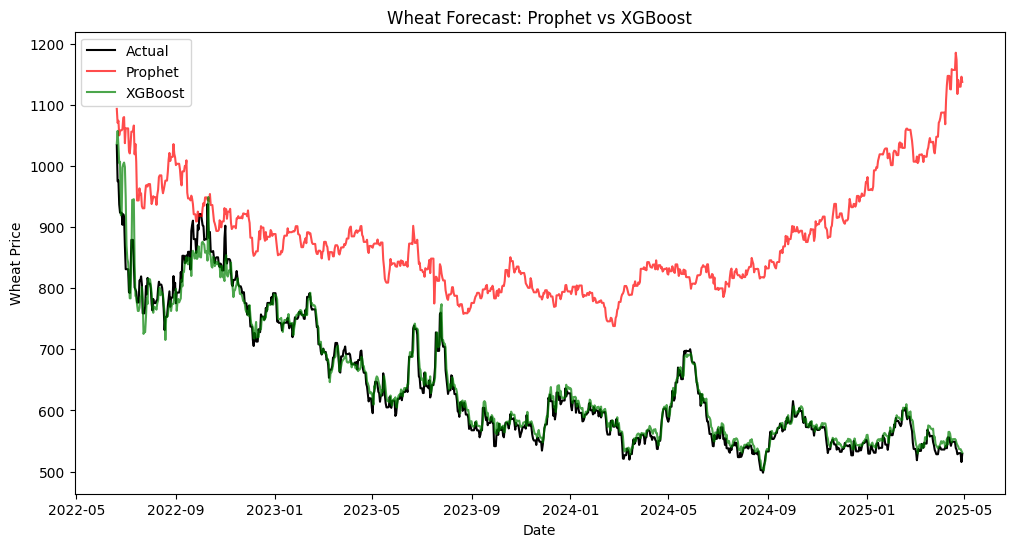


Commodity: Soybean
Selected regressors: ['Crude_Oil_WTI', 'Silver', 'Natural_Gas', 'Corn', 'Wheat', 'Copper', 'Platinum']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Silver': 0, 'Natural_Gas': 0, 'Corn': 0, 'Wheat': 0, 'Copper': 0, 'Platinum': 0}


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



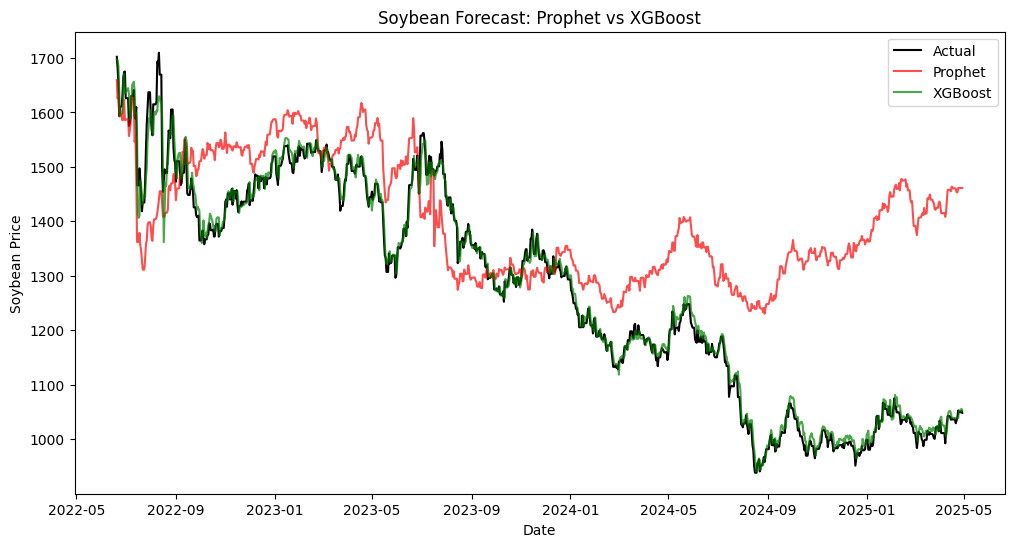


Commodity: Copper
Selected regressors: ['Crude_Oil_WTI', 'Gold', 'Silver', 'Natural_Gas', 'Corn', 'Wheat', 'Soybean', 'Palladium']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Gold': 0, 'Silver': 0, 'Natural_Gas': 0, 'Corn': 0, 'Wheat': 0, 'Soybean': 0, 'Palladium': 0}


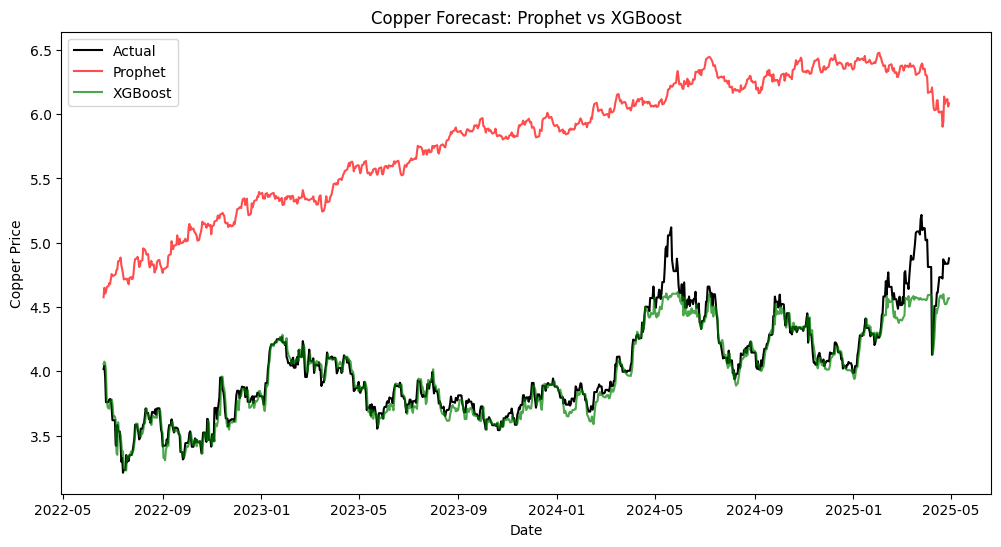


Commodity: Platinum
Selected regressors: ['Crude_Oil_WTI', 'Silver', 'Corn', 'Wheat', 'Soybean', 'Palladium']
NaN counts in future regressors (should be 0): {'Crude_Oil_WTI': 0, 'Silver': 0, 'Corn': 0, 'Wheat': 0, 'Soybean': 0, 'Palladium': 0}


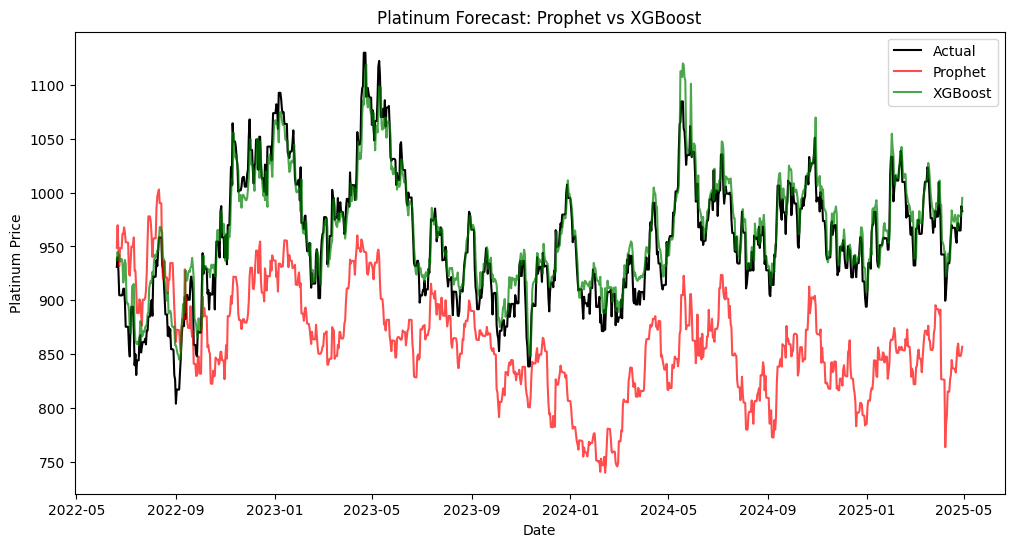


Commodity: Palladium
Selected regressors: ['Gold', 'Wheat', 'Copper', 'Platinum']
NaN counts in future regressors (should be 0): {'Gold': 0, 'Wheat': 0, 'Copper': 0, 'Platinum': 0}


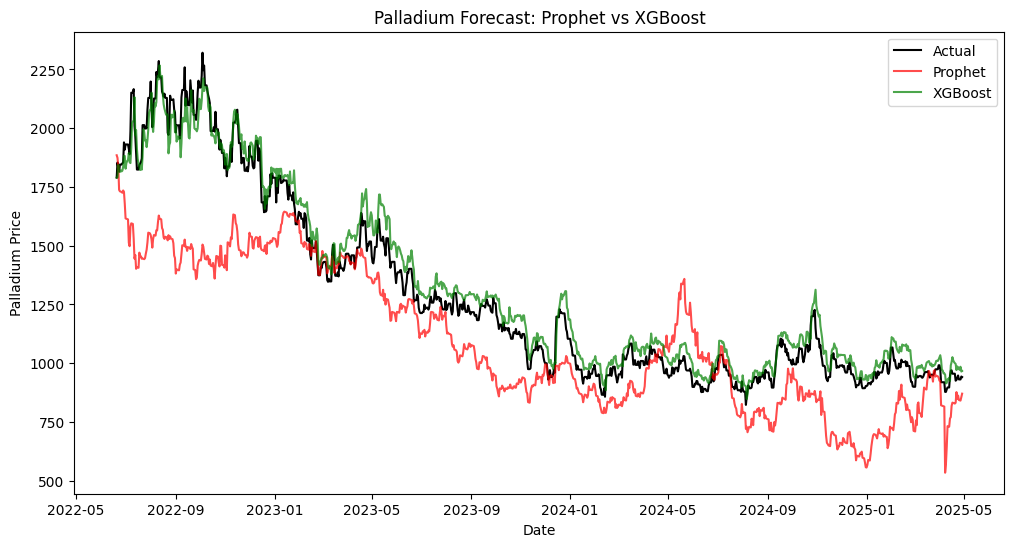


Metrics for Crude_Oil_WTI:
     Model        MAE       RMSE         R2
0  Prophet  10.284027  10.749510  -0.636899
1    ARIMA  31.642051  32.732997 -14.178050
2  XGBoost   1.024140   1.366755   0.973538

Metrics for Brent_Oil:
     Model        MAE       RMSE         R2
0  Prophet   7.840994   7.992769   0.187502
1    ARIMA  30.681544  31.914871 -11.954305
2  XGBoost   1.087697   1.465158   0.972698

Metrics for Gold:
     Model         MAE        RMSE        R2
0  Prophet  205.540627  282.641237  0.510780
1    ARIMA  377.617108  527.625614 -0.704844
2  XGBoost  301.071480  462.181487 -0.308151

Metrics for Silver:
     Model       MAE      RMSE        R2
0  Prophet  2.802271  3.969575  0.190652
1    ARIMA  4.603212  5.929071 -0.805596
2  XGBoost  0.639462  0.810887  0.966227

Metrics for Natural_Gas:
     Model       MAE      RMSE         R2
0  Prophet  5.655389  6.143474 -10.139203
1    ARIMA  3.637807  3.901208  -3.491841
2  XGBoost  0.223805  0.500373   0.926105

Metrics for Corn:

In [ ]:
# -------------------------------------------------
# MULTI-COMMODITY PRICE FORECAST - FULL PIPELINE
# Prophet + ARIMA + XGBoost with automatic regressor selection
# -------------------------------------------------

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# -------------------------------
# 0. Prepare dataframe
# -------------------------------
# Ensure 'Date' exists as a column and is datetime
df = df1.copy()
if 'Date' not in df.columns:
    df = df.reset_index().rename(columns={'index': 'Date'})

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# -------------------------------
# Forecast function for a single commodity
# -------------------------------
def forecast_commodity(df_in, target, corr_threshold=0.3, collinearity_thresh=0.9, lags=7, future_periods=30):
    df_copy = df_in.copy()

    if target not in df_copy.columns:
        raise ValueError(f"{target} not in dataframe columns")
    if 'Date' not in df_copy.columns:
        raise ValueError("Dataframe must have 'Date' column")

    # Work on a local copy and rename for Prophet
    df_copy = df_copy[['Date'] + [c for c in df_copy.columns if c != 'Date']].copy()
    df_copy.rename(columns={'Date': 'ds', target: 'y'}, inplace=True)
    df_copy['ds'] = pd.to_datetime(df_copy['ds'])
    df_copy = df_copy.sort_values('ds').reset_index(drop=True)

    # Interpolate/forward/backward fill missing values for all numeric columns
    num_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()
    for col in num_cols:
        # interpolate then fill edges
        df_copy.loc[:, col] = df_copy[col].interpolate(method='linear', limit_direction='both')
        df_copy.loc[:, col] = df_copy[col].ffill().bfill()

    # Clip unrealistic negatives on target
    df_copy.loc[:, 'y'] = df_copy['y'].clip(lower=0)

    # -------------------------------
    # Automatic regressor selection
    # -------------------------------
    possible_regs = [c for c in df_copy.columns if c not in ['ds', 'y']]
    if len(possible_regs) == 0:
        final_regressors = []
    else:
        corr_matrix = df_copy[['y'] + possible_regs].corr()
        corr_with_target = corr_matrix['y'].drop('y')
        useful_regressors = corr_with_target[abs(corr_with_target) > corr_threshold].index.tolist()

        # Remove highly collinear regressors
        final_regressors = []
        if len(useful_regressors) > 0:
            reg_corr = df_copy[useful_regressors].corr().abs()
            to_remove = set()
            cols = reg_corr.columns.tolist()
            for i in range(len(cols)):
                for j in range(i):
                    if reg_corr.iloc[i, j] > collinearity_thresh:
                        # remove the later column (you may prefer other logic)
                        to_remove.add(cols[i])
            final_regressors = [r for r in useful_regressors if r not in to_remove]

    print(f"\nCommodity: {target}")
    print("Selected regressors:", final_regressors)

    # -------------------------------
    # Train-test split (by index but aligned with dates)
    # -------------------------------
    train_size = int(len(df_copy) * 0.8)
    train_cut_date = df_copy['ds'].iloc[train_size] if train_size < len(df_copy) else df_copy['ds'].iloc[-1]
    train = df_copy.iloc[:train_size].copy()
    test = df_copy.iloc[train_size:].copy()

    # -------------------------------
    # Prophet
    # -------------------------------
    prophet_model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=2.0
    )

    # Add regressors if any
    for reg in final_regressors:
        prophet_model.add_regressor(reg)

    # Fit - ensure no NaNs in regressors in train
    if final_regressors:
        for reg in final_regressors:
            if train[reg].isna().any():
                train.loc[:, reg] = train[reg].interpolate().ffill().bfill()
    prophet_model.fit(train)

    # Create future dataframe covering test period
    future = prophet_model.make_future_dataframe(periods=len(test), freq=None)  # keep same freq as input
    # Merge regressors into future by date (left join)
    if final_regressors:
        future = future.merge(df_copy[['ds'] + final_regressors], on='ds', how='left')
        # Fill regressors for the future portion (use last known value forward)
        for reg in final_regressors:
            future.loc[:, reg] = future[reg].ffill().bfill()
    else:
        # ensure future has columns if none selected (no-op but explicit)
        pass

    # sanity check
    if final_regressors:
        nan_counts = future[final_regressors].isna().sum().to_dict()
        print("NaN counts in future regressors (should be 0):", nan_counts)

    forecast = prophet_model.predict(future)

    # Metrics for Prophet (align by ds)
    forecast_test = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds', how='inner').rename(columns={'y':'y_true', 'yhat':'y_pred'})
    y_true = forecast_test['y_true'].values
    y_pred = forecast_test['y_pred'].values
    mae_prophet = mean_absolute_error(y_true, y_pred)
    rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
    r2_prophet = r2_score(y_true, y_pred)

    # -------------------------------
    # ARIMA (simple baseline)
    # -------------------------------
    try:
        if len(train['y'].dropna()) > 10:
            model_arima = ARIMA(train['y'], order=(1,1,1))
            result_arima = model_arima.fit()
            pred_arima = result_arima.forecast(steps=len(test))
            mae_arima = mean_absolute_error(y_true, pred_arima)
            rmse_arima = np.sqrt(mean_squared_error(y_true, pred_arima))
            r2_arima = r2_score(y_true, pred_arima)
        else:
            mae_arima = rmse_arima = r2_arima = np.nan
            pred_arima = np.array([np.nan]*len(test))
    except Exception as e:
        print("ARIMA failed:", e)
        mae_arima = rmse_arima = r2_arima = np.nan
        pred_arima = np.array([np.nan]*len(test))

    # -------------------------------
    # XGBoost
    # -------------------------------
    # Create lag/rolling features on a copy, then align train/test by ds
    df_lag = df_copy.copy()
    for lag in range(1, lags+1):
        df_lag[f'lag_{lag}'] = df_lag['y'].shift(lag)

    df_lag['roll_mean_7'] = df_lag['y'].rolling(7, min_periods=1).mean()
    df_lag['roll_std_7'] = df_lag['y'].rolling(7, min_periods=1).std().fillna(0)

    # drop rows that have NaNs due to shifting (these will be the earliest rows)
    df_lag = df_lag.dropna(subset=[f'lag_{lags}']).reset_index(drop=True)

    # Align train/test for XGB by ds (so it uses the same test period)
    train_xgb = df_lag[df_lag['ds'] < df_copy['ds'].iloc[train_size]].copy()
    test_xgb = df_lag[df_lag['ds'] >= df_copy['ds'].iloc[train_size]].copy()

    xgb_features = final_regressors + [f'lag_{i}' for i in range(1, lags+1)] + ['roll_mean_7', 'roll_std_7']
    # If any regressor missing in df_lag (possible when final_regressors=[]), remove
    xgb_features = [c for c in xgb_features if c in df_lag.columns]

    if len(test_xgb) == 0 or len(train_xgb) < 5:
        # Not enough data for XGBoost
        mae_xgb = rmse_xgb = r2_xgb = np.nan
        pred_xgb = np.array([np.nan]*len(test))
        print("XGBoost skipped due to insufficient data.")
    else:
        try:
            X_train = train_xgb[xgb_features]
            y_train = train_xgb['y']
            X_test = test_xgb[xgb_features]
            y_test = test_xgb['y']

            xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=6, learning_rate=0.05, verbosity=0)
            xgb_model.fit(X_train, y_train)
            pred_xgb = xgb_model.predict(X_test)

            mae_xgb = mean_absolute_error(y_test, pred_xgb)
            rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
            r2_xgb = r2_score(y_test, pred_xgb)
        except Exception as e:
            print("XGBoost failed:", e)
            mae_xgb = rmse_xgb = r2_xgb = np.nan
            pred_xgb = np.array([np.nan]*len(test))

    # -------------------------------
    # Model comparison
    # -------------------------------
    metrics = pd.DataFrame({
        'Model': ['Prophet', 'ARIMA', 'XGBoost'],
        'MAE': [mae_prophet, mae_arima, mae_xgb],
        'RMSE': [rmse_prophet, rmse_arima, rmse_xgb],
        'R2': [r2_prophet, r2_arima, r2_xgb]
    })

    # -------------------------------
    # Future forecast for Prophet (future_periods)
    # -------------------------------
    future_df = prophet_model.make_future_dataframe(periods=future_periods, freq=None)
    if final_regressors:
        future_df = future_df.merge(df_copy[['ds'] + final_regressors], on='ds', how='left')
        # For the periods after the dataset, forward-fill last known values (or you could supply modeled regressors)
        for reg in final_regressors:
            future_df.loc[:, reg] = future_df[reg].ffill().bfill()
    future_forecast = prophet_model.predict(future_df.tail(future_periods))

    # -------------------------------
    # Visualization - Prophet vs XGBoost
    # -------------------------------
    plt.figure(figsize=(12, 6))
    plt.plot(test['ds'], test['y'], label='Actual', color='black')
    plt.plot(forecast_test['ds'], forecast_test['y_pred'], label='Prophet', color='red', alpha=0.7)
    if len(pred_xgb) == len(test_xgb):
        # align pred_xgb to test_xgb ds
        plt.plot(test_xgb['ds'], pred_xgb, label='XGBoost', color='green', alpha=0.7)
    plt.title(f"{target} Forecast: Prophet vs XGBoost")
    plt.xlabel("Date")
    plt.ylabel(f"{target} Price")
    plt.legend()
    plt.show()

    return metrics, future_forecast, final_regressors

# -------------------------------
# 1. Run forecasts for multiple commodities
# -------------------------------
commodities = ['Crude_Oil_WTI', 'Brent_Oil', 'Gold', 'Silver', 'Natural_Gas',
       'Corn', 'Wheat', 'Soybean', 'Copper', 'Platinum', 'Palladium']

all_results = {}

for c in commodities:
    if c not in df.columns:
        print(f"Skipping {c} (not in dataframe).")
        continue
    metrics, future_forecast, regressors = forecast_commodity(df, target=c)
    all_results[c] = {
        'metrics': metrics,
        'future_forecast': future_forecast,
        'regressors': regressors
    }

# -------------------------------
# 2. Print metrics for all commodities
# -------------------------------
for c, v in all_results.items():
    print(f"\nMetrics for {c}:")
    print(v['metrics'])


In [ ]:
df1.columns

Index(['Crude_Oil_WTI', 'Brent_Oil', 'Gold', 'Silver', 'Natural_Gas', 'Corn',
       'Wheat', 'Soybean', 'Copper', 'Platinum', 'Palladium'],
      dtype='object')

In [ ]:
import joblib

# Save the model
joblib.dump(xgb_model, "xgb_model_commodity.pkl")

# Later, you can load it
xgb_model_loaded = joblib.load("xgb_model_commodity.pkl")


In [ ]:
df1.shape

(5224, 11)

In [ ]:
df.shape

(5224, 12)

In [ ]:
df.head()

Date  Crude_Oil_WTI  Brent_Oil         Gold     Silver  Natural_Gas  \
0 2011-01-10      89.250000  95.699997  1373.699951  28.851000        4.399   
1 2011-01-11      91.110001  97.610001  1384.000000  29.490000        4.481   
2 2011-01-12      91.860001  98.120003  1385.699951  29.532000        4.531   
3 2011-01-13      91.400002  98.059998  1386.900024  29.252001        4.407   
4 2011-01-14      91.540001  98.007999  1360.400024  28.309000        4.480   

     Corn   Wheat  Soybean  Copper     Platinum   Palladium  
0  607.00  767.25  1373.25  4.2545  1743.000000  748.650024  
1  607.00  759.50  1350.50  4.3390  1767.599976  782.750000  
2  631.00  770.50  1409.00  4.4020  1797.900024  805.799988  
3  642.50  783.50  1410.00  4.3670  1818.599976  811.400024  
4  648.75  773.25  1406.50  4.4035  1813.400024  788.450012

In [ ]:
df1.head()

Crude_Oil_WTI  Brent_Oil         Gold     Silver  Natural_Gas  \
Date                                                                        
2011-01-10      89.250000  95.699997  1373.699951  28.851000        4.399   
2011-01-11      91.110001  97.610001  1384.000000  29.490000        4.481   
2011-01-12      91.860001  98.120003  1385.699951  29.532000        4.531   
2011-01-13      91.400002  98.059998  1386.900024  29.252001        4.407   
2011-01-14      91.540001  98.007999  1360.400024  28.309000        4.480   

              Corn   Wheat  Soybean  Copper     Platinum   Palladium  
Date                                                                  
2011-01-10  607.00  767.25  1373.25  4.2545  1743.000000  748.650024  
2011-01-11  607.00  759.50  1350.50  4.3390  1767.599976  782.750000  
2011-01-12  631.00  770.50  1409.00  4.4020  1797.900024  805.799988  
2011-01-13  642.50  783.50  1410.00  4.3670  1818.599976  811.400024  
2011-01-14  648.75  773.25  1406.50  4.4035  1813.400024  788.450012

In [ ]:
df1.to_csv("all_commodities.csv")